In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#한글 폰트 깨짐 방지
plt.style.use('fivethirtyeight')
plt.rc("font", family="NanumGothic")
plt.rc("axes", unicode_minus =False)

In [3]:
#데이터 불러오기
train=pd.read_csv("movies_train.csv")

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
color=sns.color_palette()
%matplotlib inline

데이터 내 변수 확인
* title : 영화의 제목
* distributor : 배급사
* genre : 장르
* release_time : 개봉일
* time : 상영시간(분)
* screening_rat : 상영등급
* director : 감독이름
* dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
* dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
* num_staff : 스텝수
* num_actor : 주연배우수
* box_off_num : 관객수

In [6]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [7]:
# 데이터 프레임의 크기와 변수 확인
train.shape

(600, 12)

train의 경우, 600개의 행과 12개의 columns로 이루어져 있다.

submission의 경우, 243개의 행과 2개의 columns로 이루어져 있다.

-> 즉, 600개의 데이터를 학습시켜 243개의 데이터를 이용해 예측을 진행해야 한다.

In [8]:
#데이터 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


train 데이터셋을 info( )로 전반적인 구조를 확인하여 다음과 같은 전처리가 필요한 것을 확인할 수 있었다.
dir_prev_bfnum에서만 Non-Null의 수가 적은 것으로 보아 결측치가 확인되는 것을 알 수 있었다.

-> 이때 dir_prev_dfnum은 관객수 이므로 결측값의 형태를 확인하고, int형이 아니라면 int형인 0으로 바꾸어주도록 하자.

또한 release_time의 경우 날짜 / 시간에 관련된 데이터인데, 해당 데이터 타입이 object로 설정되어 있음을 확인할 수 있었다.

-> 이를 datetime64[ns] 타입으로 변경해주어야 한다.

In [9]:
#날짜가 stringtype으로 입력되어 있어서 datatype으로 변경하기
import pandas as pd
import datetime as dt

train['release_time'] = pd.to_datetime(train['release_time'])

위에서 이미 info( )를 이용하여 결측치를 확인하였지만, isna()를 이용하여 결측치에 대한 개수를 추가적으로 확인하도록 하자.

In [10]:
#결측치 존재 여부 확인
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

결측치의 형태를 확인해보니, 이들의 형태는 NaN의 결측값 형태로 나타남을 알 수 있다.

-> 분석을 위하여 이를 int형인 0으로 변경하자. 이때 원본데이터를 변경해야하므로 inplace=True로 설정하자.

In [11]:
# 결측치 처리
train['dir_prev_bfnum'].fillna(0, inplace=True)

In [12]:
print(train[train['distributor']=='시네마 달'])

         title distributor  genre release_time  time screening_rat director  \
107  미국의 바람과 불       시네마 달  다큐멘터리   2012-07-26   118       15세 관람가      김경만   
108      레드마리아       시네마 달  다큐멘터리   2012-04-26    98       15세 관람가       경순   
167  모래가 흐르는 강       시네마 달  다큐멘터리   2013-03-28    75        전체 관람가     지율스님   
212      땅의 여자       시네마 달  다큐멘터리   2010-09-09    95        전체 관람가      권우정   
216     나비와 바다       시네마 달  다큐멘터리   2013-01-24    89       12세 관람가      박배일   
497     쿠바의 연인       시네마 달  다큐멘터리   2011-01-13    93       15세 관람가      정호현   

     dir_prev_bfnum  dir_prev_num  num_staff  num_actor  box_off_num  
107             0.0             0          6          0          652  
108         10393.5             2          4         10         2119  
167             0.0             0         11          0        10942  
212             0.0             0          7          3         2418  
216             0.0             0          6          2         1240  
497             0.0 

In [13]:
## 시네마달 관련 데이터 전처리 이전에 시행한 코드 실행하면 안됨!

list_cinemadal = train[train['distributor']=='시네마 달'].index
print(list_cinemadal)

Index([107, 108, 167, 212, 216, 497], dtype='int64')


In [14]:
print(train[train['distributor']=='시네마달'])

                   title distributor  genre release_time  time screening_rat  \
204  다이빙벨: 진실은 침몰하지 않습니다        시네마달  다큐멘터리   2014-10-23    77       15세 관람가   
274               탐욕의 제국        시네마달  다큐멘터리   2014-03-06    92       12세 관람가   
342             그리고 싶은 것        시네마달  다큐멘터리   2013-08-15    92        전체 관람가   
363                꿈의 공장        시네마달  다큐멘터리   2011-09-01    87       12세 관람가   
407                 다이빙벨        시네마달  다큐멘터리   2014-10-23    77       15세 관람가   
425                   보라        시네마달  다큐멘터리   2011-11-24   136        전체 관람가   
447              슬기로운 해법        시네마달  다큐멘터리   2014-05-15    94       12세 관람가   
534               밀양 아리랑        시네마달  다큐멘터리   2015-07-16   102       15세 관람가   
545              남쪽으로 간다        시네마달    드라마   2012-11-15    45      청소년 관람불가   
577             망원동 인공위성        시네마달  다큐멘터리   2015-02-05   108       12세 관람가   

    director  dir_prev_bfnum  dir_prev_num  num_staff  num_actor  box_off_num  
204      이상호             0.0           

In [15]:
print(train[train['distributor']=='NEW'])

                 title distributor   genre release_time  time screening_rat  \
39                러브픽션         NEW  멜로/로맨스   2012-02-29   121       15세 관람가   
90                인간중독         NEW     드라마   2014-05-14   132      청소년 관람불가   
97                 사이비         NEW   애니메이션   2013-11-21   100      청소년 관람불가   
183  고사 두 번째 이야기: 교생실습         NEW      공포   2010-07-28    84       15세 관람가   
358              카운트다운         NEW      액션   2011-09-29   119      청소년 관람불가   
389                 무게         NEW     드라마   2013-11-07   108      청소년 관람불가   
397            헬로우 고스트         NEW     코미디   2010-12-22   111       12세 관람가   
468               미쓰GO         NEW     코미디   2012-06-21   115       15세 관람가   

    director  dir_prev_bfnum  dir_prev_num  num_staff  num_actor  box_off_num  
39       전계수    8.052500e+03             2        315          2      1726227  
90       김대우    1.322801e+06             4        379          4      1441990  
97       연상호    0.000000e+00             0      

In [16]:
print(train[train['distributor']=='(주)NEW'])
list_new = train[train['distributor']=='(주)NEW'].index

                  title distributor   genre release_time  time screening_rat  \
3              나는 공무원이다      (주)NEW     코미디   2012-07-12   101        전체 관람가   
28                  무법자      (주)NEW     느와르   2010-03-18    93      청소년 관람불가   
48                  빅매치      (주)NEW      액션   2014-11-26   112       15세 관람가   
67           열정같은소리하고있네      (주)NEW     드라마   2015-11-25   106       15세 관람가   
86                  반창꼬      (주)NEW     드라마   2012-12-19   120       15세 관람가   
104                 풍산개      (주)NEW     드라마   2011-06-23   121      청소년 관람불가   
122                 변호인      (주)NEW     드라마   2013-12-18   127       15세 관람가   
131                 피에타      (주)NEW     드라마   2012-09-06   104      청소년 관람불가   
164         지금은맞고그때는틀리다      (주)NEW     드라마   2015-09-24   121      청소년 관람불가   
190              부러진 화살      (주)NEW     드라마   2012-01-18   100       15세 관람가   
214                초능력자      (주)NEW      SF   2010-11-10   114       15세 관람가   
244           그대를 사랑합니다      (주)NEW     

In [17]:
## 전처리 작업

train.loc[list_cinemadal, 'distributor'] = '시네마달'
train.loc[list_new, 'distributor'] = 'NEW'

In [18]:
print(train[train['distributor']=='시네마 달'])
print(train[train['distributor']=='(주)NEW'])

Empty DataFrame
Columns: [title, distributor, genre, release_time, time, screening_rat, director, dir_prev_bfnum, dir_prev_num, num_staff, num_actor, box_off_num]
Index: []
Empty DataFrame
Columns: [title, distributor, genre, release_time, time, screening_rat, director, dir_prev_bfnum, dir_prev_num, num_staff, num_actor, box_off_num]
Index: []


1. dir_prev_bfnum : 결측치 존재. 감독의 전작이 없는 경우이기 때문에 결측값을 0으로 변경하는 작업 수행
2. release_time : datetime이 아닌 문자열 정보로 나오기 때문에 datetime 객체로 변경해주는 작업 수행
3. distributor : NEW와 시네마달 배급사가 (주)NEW, 시네마 달 이라는 다른 이름으로 들어간 것이 확인됨. 후자 데이터의 배급사 정보를 전자 정보로 변경해주는 작업 수행

In [19]:
sort_Data=train.sort_values(by=['release_time'], ascending=True)
print(sort_Data['release_time'].head())
print(sort_Data['release_time'].nunique())

109   2010-01-02
207   2010-01-14
475   2010-01-14
46    2010-01-14
228   2010-01-14
Name: release_time, dtype: datetime64[ns]
330


## 1. 영화 개봉 일/월별 평균관객수

In [20]:
#월과 일에 대한 칼럼을 추가
train_df=train.copy()
train_df['day']=train_df['release_time'].dt.day
train_df['month']=train_df['release_time'].dt.month

In [21]:
day_num=train_df.groupby('day')['box_off_num'].aggregate('mean').reset_index()
month_num=train_df.groupby('month')['box_off_num'].aggregate('mean').reset_index()

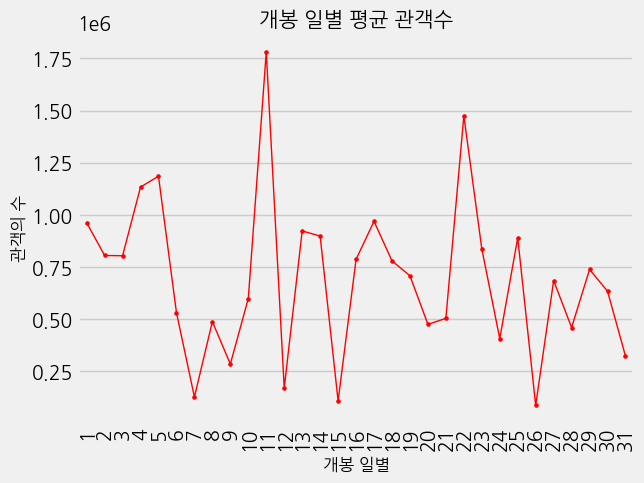

In [22]:
#일별 관객수 시각화
day_num=train_df.groupby('day')['box_off_num'].aggregate('mean').reset_index()
sns.pointplot(x='day',y='box_off_num', data=day_num, linewidth=1,color='red')
plt.xlabel('개봉 일별',fontsize=12)
plt.ylabel('관객의 수',fontsize=12)
plt.xticks(rotation=90)
plt.title("개봉 일별 평균 관객수",fontsize=15)
plt.show()

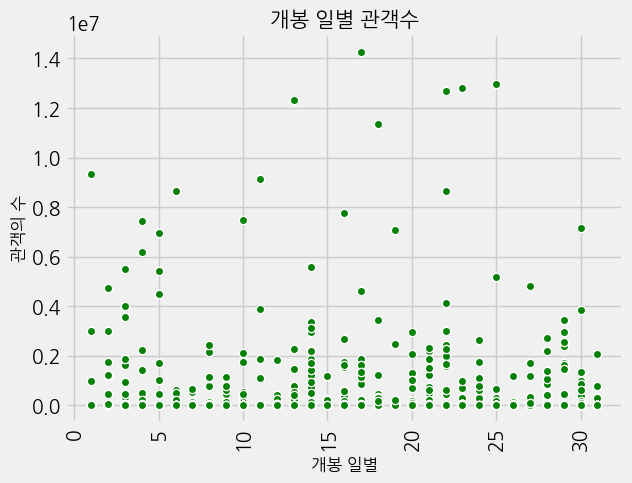

In [23]:
#일별 관객수 시각화-scatterplot
day_num=train_df.groupby('day')['box_off_num'].aggregate('mean').reset_index()
sns.scatterplot(x='day',y='box_off_num', data=train_df, linewidth=1,color='green')
plt.xlabel('개봉 일별',fontsize=12)
plt.ylabel('관객의 수',fontsize=12)
plt.xticks(rotation=90)
plt.title("개봉 일별 관객수",fontsize=15)
plt.show()

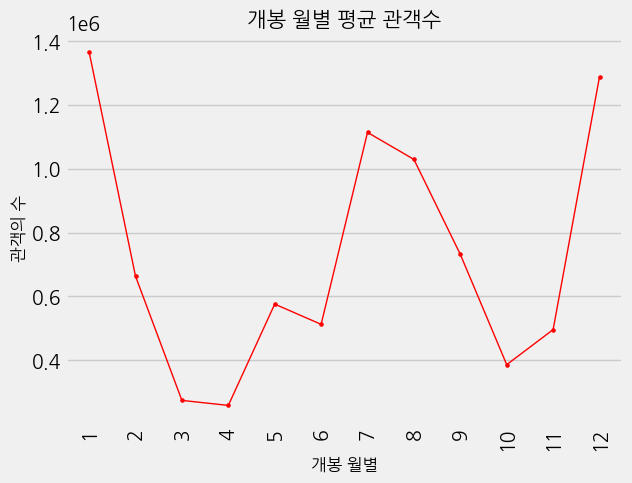

In [24]:
#월별 관객수 시각화
month_num=train_df.groupby('month')['box_off_num'].aggregate('mean').reset_index()

sns.pointplot(x='month',y='box_off_num', data=month_num, linewidth=1,color='red')
plt.xlabel('개봉 월별',fontsize=12)
plt.ylabel('관객의 수',fontsize=12)
plt.xticks(rotation=90)
plt.title("개봉 월별 평균 관객수",fontsize=15)
plt.show()

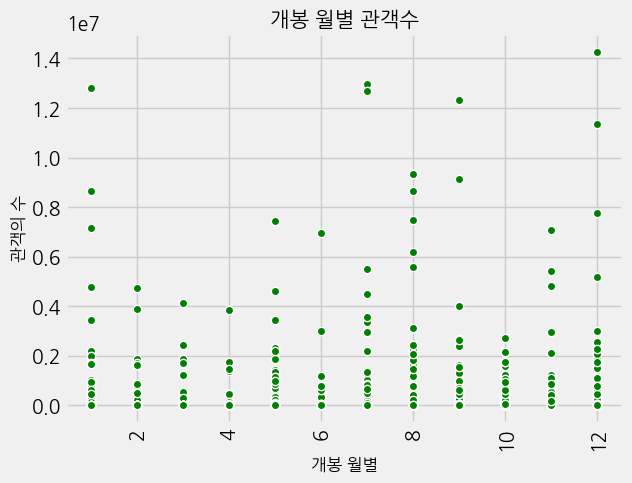

In [25]:
#월별 관객수 시각화-scatterplot
month_num=train_df.groupby('month')['box_off_num'].aggregate('mean').reset_index()

sns.scatterplot(x='month',y='box_off_num', data=train_df, linewidth=1,color='green')
plt.xlabel('개봉 월별',fontsize=12)
plt.ylabel('관객의 수',fontsize=12)
plt.xticks(rotation=90)
plt.title("개봉 월별 관객수",fontsize=15)
plt.show()

### <그래프 해석>
개봉 일별 관객의 수 그래프를 통해서 영화가 5,11,22일의 평균 관객수가 많다는 것을 알 수 있다.

개봉 월별 관객의 수 그래프를 통해서 관객수가 많다는 것을 알 수 있다.

-> 위 그래프를 통해서 여름과 겨울에 개봉한 영화의 평균 관객수가 많을 것이라는 것을 알 수 있다.

______

## 2.주요 제작사별 영화 제작 편수와 평균 관객 수의 관계

In [26]:
#제작사별 제작한 영화의 총 개수를 데이터 프레임으로 표현
pd.DataFrame(train['distributor'].value_counts().head(7))

,count
distributor,
CJ 엔터테인먼트,54
롯데엔터테인먼트,52
NEW,38
(주)마운틴픽쳐스,29
인디스토리,26
(주)쇼박스,26
시네마달,16


In [27]:
#영화를 많이 제작한 7개의 제작사를 top7_distributor로 설정
top7_distributor = train['distributor'].value_counts().head(7).index.tolist()
top7_distributor

['CJ 엔터테인먼트', '롯데엔터테인먼트', 'NEW', '(주)마운틴픽쳐스', '인디스토리', '(주)쇼박스', '시네마달']

In [28]:
#영화를 많이 제작한 7개의 제작사만 있는 데이터를 불러오기
train_top7=train[train['distributor'].isin(top7_distributor)]
train_top7.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211


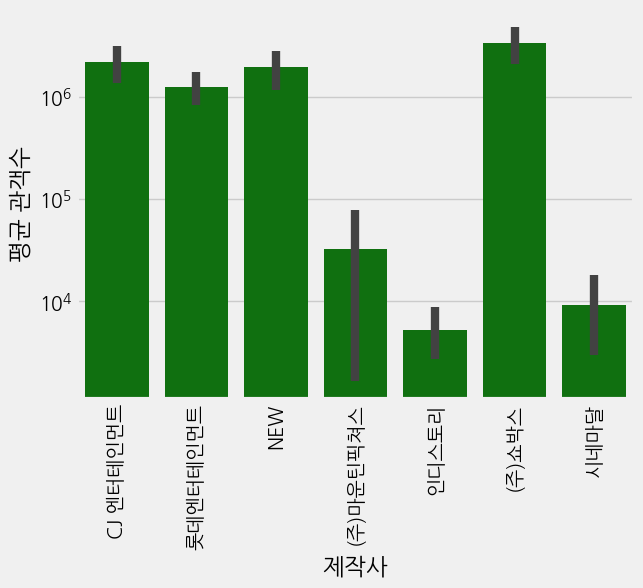

In [29]:
##주요 제작사별 영화 제작 편수와 평균 관객 수의 관계
sns.barplot(x='distributor',y='box_off_num', data=train_top7, order=top7_distributor, color='green')
plt.xticks(rotation=90)
plt.xlabel('제작사')
plt.ylabel('평균 관객수')
plt.yscale('log')
plt.show()

### 그래프 해석
대형 배급사(CJ, 롯데, NEW, 쇼박스)는 제작 편수가 많고 평균 관객 수도 높음.
    
작은 배급사(마운틴픽쳐스, 인디스토리, 골든타이드픽처스)는 제작 편수도 적고 평균 관객 수도 낮음.

-> 즉, "많이 제작한 제작사일수록 평균 관객 수가 높다"는 경향이 보임.

하지만, (주)마운틴픽쳐스 (29편)의 제작 편수는 많지만 평균 관객 수 낮은 것을 통해서 단순히 제작 편수가 많다고 관객 수가 늘어난다고 단정할 수 없다.


### < 목표 > 관객 수가 많은 감독의 이전 작품 수와 관객 수를 분석

관객 수가 많은 감독을 알아내기 위해 관객 수 상위 10개의 데이터를 추출 후 총 관객 수가 많은 감독 상위 10명을 시각화

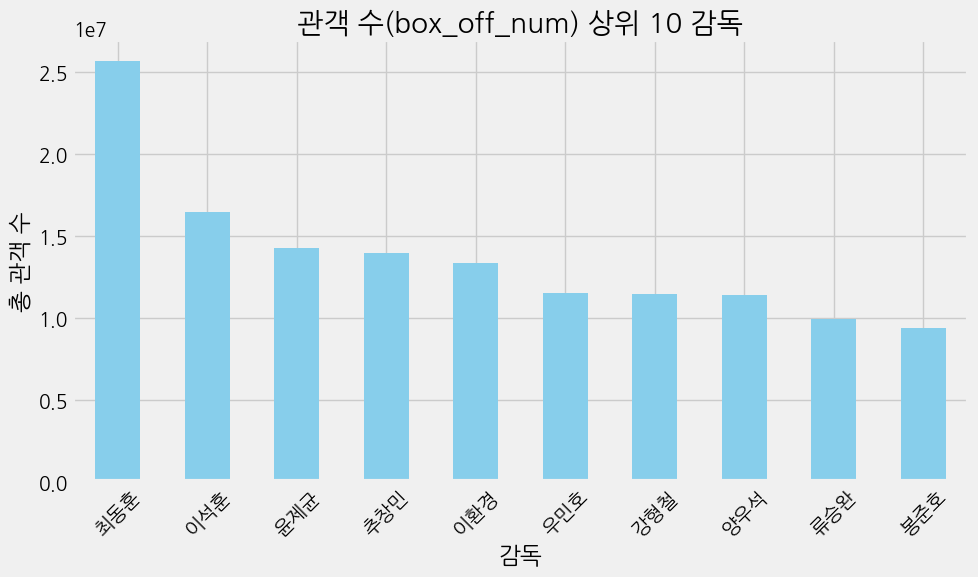

In [30]:
# 각 감독별 총 관객 수(box_off_num) 계산
director_box_off = train.groupby('director')['box_off_num'].sum().sort_values(ascending=False)

# 관객 수(box_off_num)가 많은 상위 10명의 감독 추출
top10_directors = director_box_off.head(10)

# 시각화
plt.figure(figsize=(10, 6))
top10_directors.plot(kind='bar', color='skyblue')
plt.title('관객 수(box_off_num) 상위 10 감독')
plt.xlabel('감독')
plt.ylabel('총 관객 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

관객 수 상위 10개 영화의 감독 데이터를 추출하여 시각화한 결과이다.

'최동훈' 감독이 총 관객 수 상위 감독 10명 내에서도 상대적으로 더 많은 관객 수를 보이고 있다.

다음 그래프에서 상위 3개의 영화 감독인 '최동훈', '이석훈', '윤제균' 감독을 위주로 추가 분석 시도

_______

위의 영화감독 10명의 이전 작품 수와 이전 작품의 평균 관객 수를 알아보겠다.

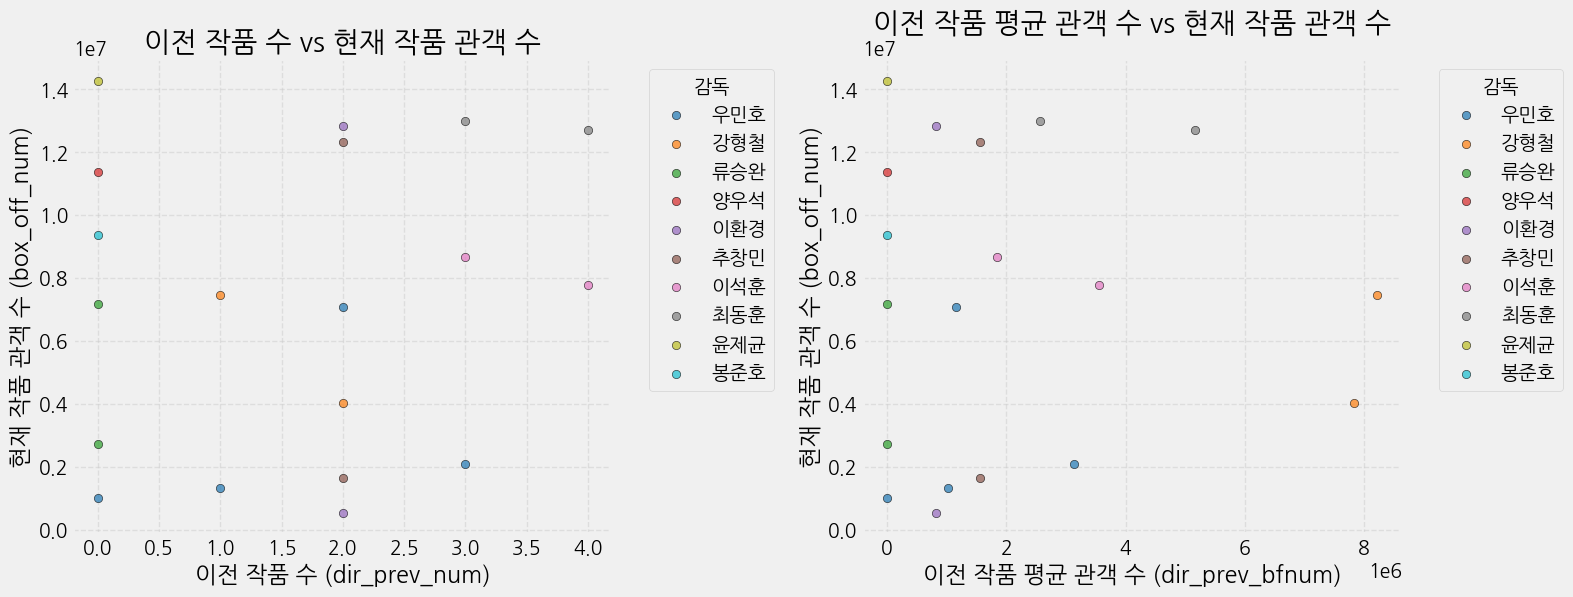

In [31]:
# 각 감독별 총 관객 수(box_off_num) 계산
director_box_off = train.groupby('director')['box_off_num'].sum().sort_values(ascending=False)

# 관객 수가 많은 상위 10 감독 추출
top10_directors = director_box_off.head(10).index.tolist()

# 상위 10 감독의 데이터만 선택
train_top10 = train[train['director'].isin(top10_directors)]

# 색상을 감독별로 다르게 설정
directors = train_top10['director'].unique()
palette = sns.color_palette('tab10', len(directors))  # 10개의 고유 색상 생성
color_map = dict(zip(directors, palette))  # 감독 이름을 색상과 매핑

# 서브플롯 생성 (1행 2열)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# 1. 이전 작품 수 vs 현재 작품 관객 수 산점도
for director in directors:
    df_subset = train_top10[train_top10['director'] == director]
    ax[0].scatter(df_subset['dir_prev_num'], df_subset['box_off_num'],
                  color=color_map[director], label=director, alpha=0.7, edgecolors='black')

ax[0].set_title('이전 작품 수 vs 현재 작품 관객 수')
ax[0].set_xlabel('이전 작품 수 (dir_prev_num)')
ax[0].set_ylabel('현재 작품 관객 수 (box_off_num)')
ax[0].grid(True, linestyle='--', alpha=0.5)
ax[0].legend(title="감독", bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 추가

# 2. 이전 작품 평균 관객 수 vs 현재 작품 관객 수 산점도
for director in directors:
    df_subset = train_top10[train_top10['director'] == director]
    ax[1].scatter(df_subset['dir_prev_bfnum'], df_subset['box_off_num'],
                  color=color_map[director], label=director, alpha=0.7, edgecolors='black')

ax[1].set_title('이전 작품 평균 관객 수 vs 현재 작품 관객 수')
ax[1].set_xlabel('이전 작품 평균 관객 수 (dir_prev_bfnum)')
ax[1].set_ylabel('현재 작품 관객 수 (box_off_num)')
ax[1].grid(True, linestyle='--', alpha=0.5)
ax[1].legend(title="감독", bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 추가

plt.tight_layout()
plt.show()

## 3. 이전 작품 수(dir_prev_num) vs 현재 작품 관객 수 (box_off_num)

위 그래프는 특정 감독이 만든 영화가 각각 point로 표시된 scatter plot이다.

앞의 그래프에서 확인한 가장 많은 총 관객 수를 가지던 '최동훈' 감독의 데이터 point를 확인해보면, 상대적으로 많은 이전 작품 수를 가지고 있으며 또한 현재 작품의 관객 수도 많은 편임을 확인할 수 있다.

두 번째로 많은 총 관객 수를 가지던 '이석훈' 감독의 데이터 point를 확인해보면, 상대적으로 많은 이전 작품 수를 가지고 있지만 현재 작품의 관객 수가 많다고는 볼 수 없다.

세 번째로 많은 총 관객 수를 가지던 '윤제균' 감독의 데이터 point를 확인해보면, 이전 작품의 수가 0개인데도 위 그래프에서 가장 높은 현재 관객 수를 보인다.

가장 많은 총 관객 수를 가지는 '최동훈' 감독의 데이터 포인트를 통해서 이전 작품 수가 많다해서 현재 작품 수의 관객 수가 많다고 볼 수 있음을 예측해볼 수 있다.

하지만 다른 감독의 데이터를 통해 알아본 결과, 양의 상관관계가 크게 존재하지 않음을 알 수 있다.

결론적으로 이전 작품 수가 많다고 반드시 다음 영화가 흥행하는 것이 아님을 확인할 수 있다.

### 4. 이전 작품 평균 관객 수(dir_prev_bfnum) vs 현재 작품의 관객 수(box_off_num)

'강형철' 감독의 데이터 포인트를 확인해보면, 상대적으로 이전 작품의 평균 관객 수가 많은 편이다. 하지만 현재 작품의 관객 수가 많다고는 볼 수 없다.

'우민호' 감독의 데이터 포인트를 보면 이전 작품의 평균 관객 수와 현재 작품의 관객 수가 양의 상관관계를 가지고 있다고 볼 수 있다.

1번 그래프에서 확인했듯이, '최동훈' 감독은 이전 작품 평균 관객 수가 상대적으로 많고, 현재 작품의 관객 수도 많다고 볼 수 있으며 '윤제균' 감독은 이전 작품의 수가 0개였으므로 이전 작품의 평균 관객 수도 0이지만, 높은 현재 작품의 관객 수를 가지고 있음을 알 수 있다.

하지만 몇몇 감독은 약한 양의 상관관계를 보이고 있는 것 같지만, 이전 작품의 평균 관객 수가 많다고 해서 현재 작품의 관객 수가 많을 것이라고 볼 수 없다.

결론적으로 이전 작품의 평균 관객 수가 많다고 해서 다음 작품들이 흥행한다는 것을 보장할 수 없다.

### 결론: 영화의 관객 수는 감독의 이전 작품의 흥행과는 관련이 거의 없다고 볼 수 있다.

## 5. 배급사
각 배급사 별로 어떤 패턴을 통해 영화를 배급하는지를 확인하는 것이 목표이다. 따라서 각 배급사의 배급 영화 갯수를 우선 확인하고, 위에서 확인한 기간이 약 5년이기 때문에 해당 기간동안 배급한 영화 갯수를 기준으로 main과 sub 배급사를 구분한다.

* 메인 / 서브 배급사
    1. 시기별로 어떤 영화를 냈고, 어떤 장르를 냈고, 그 수익은 어느 정도인지 확인한다.
    2. 배급사 별 패턴 파악 (제작 규모는 스태프 수를 통해 가늠한다.)

1. 메인 배급사 : 영화 배급 횟수 3회 초과 _ main_dist

2. 서브 배급사 : 영화 배급 횟수 3회 이하 _ sub_dist

In [32]:
##각 배급사가 배급한 영화 갯수 확인 _ 총 167개의 배급사 
dist_counts = train.groupby('distributor').size().reset_index(name='count')
## distributor 기준으로 모으고, size 확인해서 새로운 data 만들기. 칼럼 이름은 count로 

main_dist=dist_counts[dist_counts['count']>3]
## drop은 인덱스나 라벨을 지정해서 행과 열을 제거하는 함수 
## boolean 조건을 넣어서 사용할 수는 없음 --> a=a+1 이 방식을 사용하는게 더 적절함 

main_dist.sort_values(by=['count'], inplace=True, ascending=False)
##DF의 정렬에서 사용하는 sort_values()
## by로 기준 설정  / inplace 옵션과 ascending 옵션 기억하기 

sub_dist = dist_counts[dist_counts['count']<=3]
sub_dist.sort_values(by=['count'], inplace=True, ascending=False)

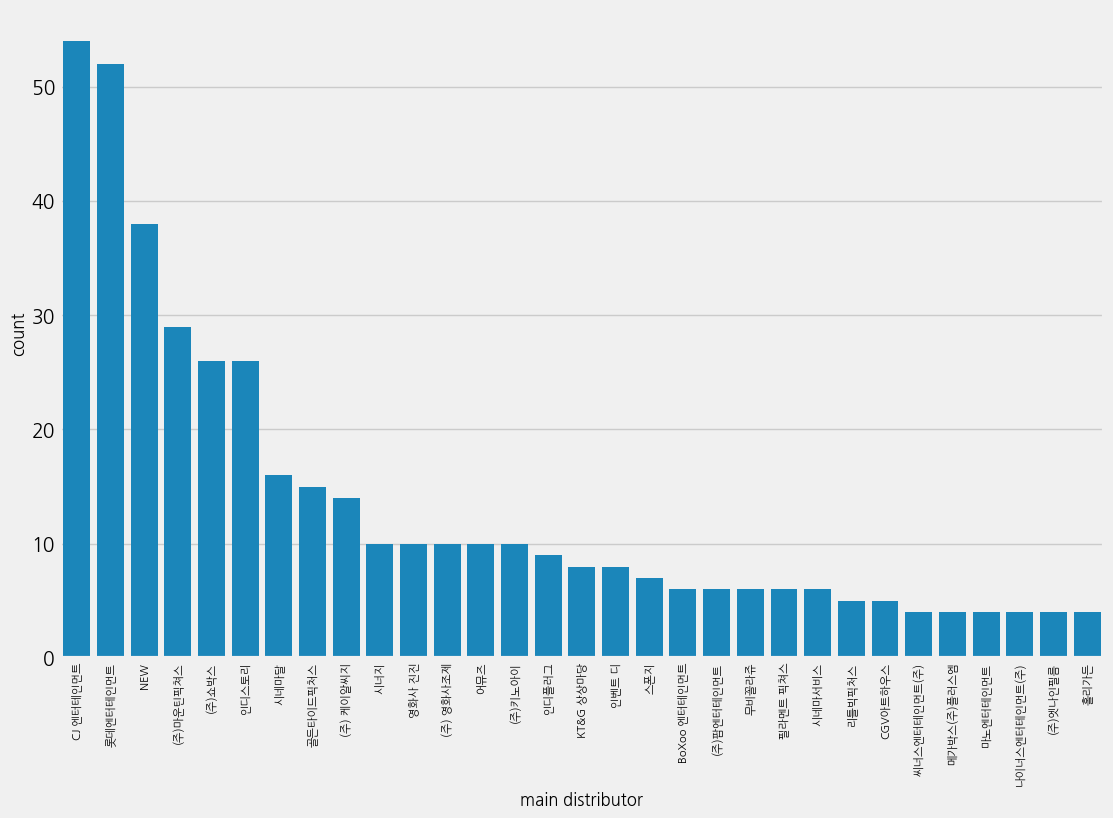

In [33]:
plt.figure(figsize=(12,8))
sns.barplot(x='distributor', y='count', data=main_dist)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('main distributor', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()

In [34]:
train.head()
len(train.groupby('distributor').size())
data_dist_genre = train.groupby(['distributor', 'genre']).size()

## len(data.groupby('distributor').size()) 여기서 size(), mean() 이걸 넣지 않고 그냥 groupby까지만 진행하면 제대로된 표가 나오는게 아니라 해당 DF가 메모리를 얼마나 차지하는지를 보여주게 된다.

## DF로 다시 만들어주고 칼럼 설정
data_dist_genre_df = data_dist_genre.reset_index()
data_dist_genre_df.columns = ['distributor', 'genre', 'count']

## 장르랑, count랑 배급사를 연결하는 작업 
main_dist_list = main_dist['distributor'].unique()
sub_dist_list = sub_dist['distributor'].unique()
main_dist_genre = data_dist_genre_df[data_dist_genre_df['distributor'].isin(main_dist_list)]
sub_dist_genre = data_dist_genre_df[data_dist_genre_df['distributor'].isin(sub_dist_list)]

In [35]:
len(main_dist_list)

31

In [36]:
main_dist_genre_pivot = main_dist_genre.pivot(
    index='distributor', 
    columns='genre', 
    values='count'
).fillna(0)

main_dist_genre_pivot = main_dist_genre_pivot.astype(int)

sub_dist_genre_pivot = sub_dist_genre.pivot(
    index='distributor', 
    columns='genre', 
    values='count'
).fillna(0)

sub_dist_genre_pivot = sub_dist_genre_pivot.astype(int)


##가독성이 너무 떨어지는데 heatmap을 적용해보자 

### 배급사와 장르의 관계

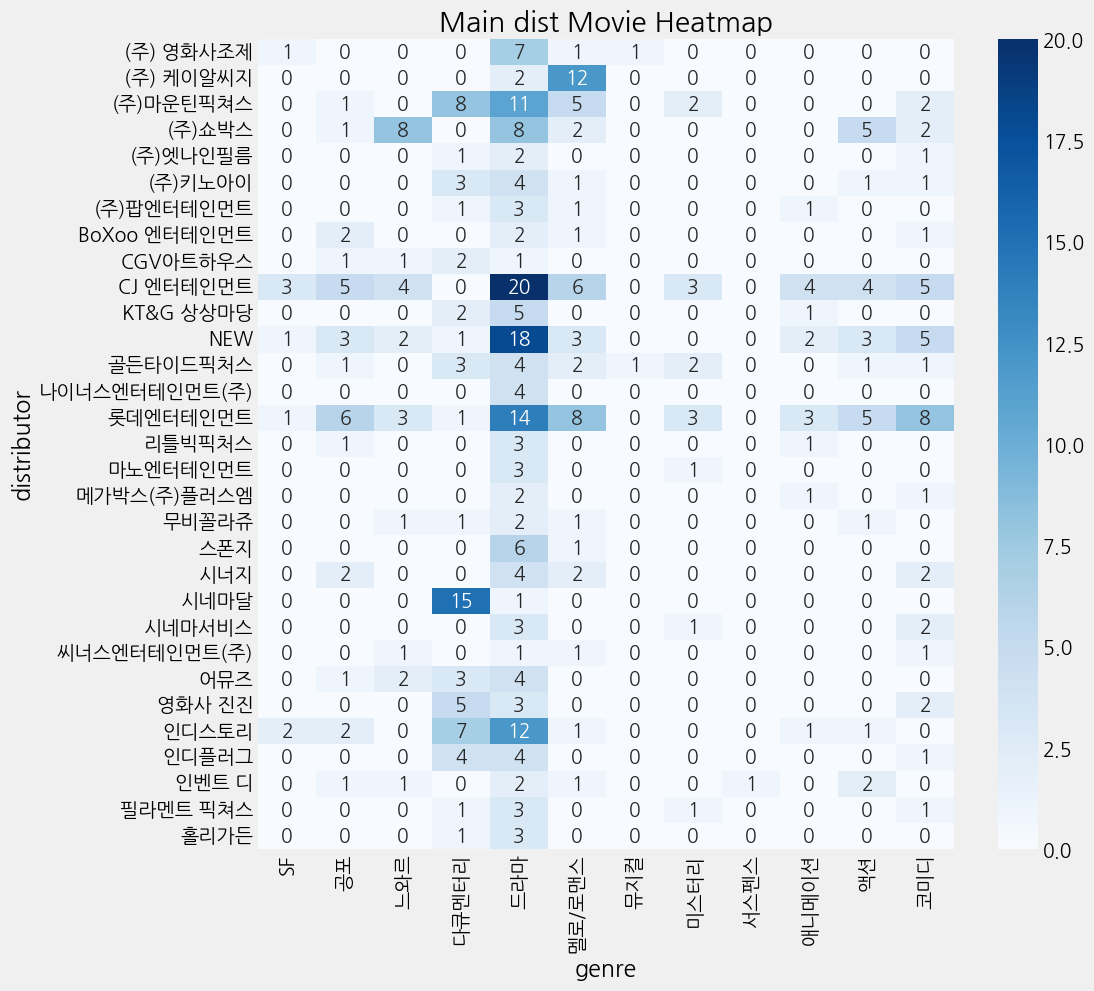

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(main_dist_genre_pivot, annot=True, fmt='d', cmap='Blues')
plt.title("Main dist Movie Heatmap")
plt.show()


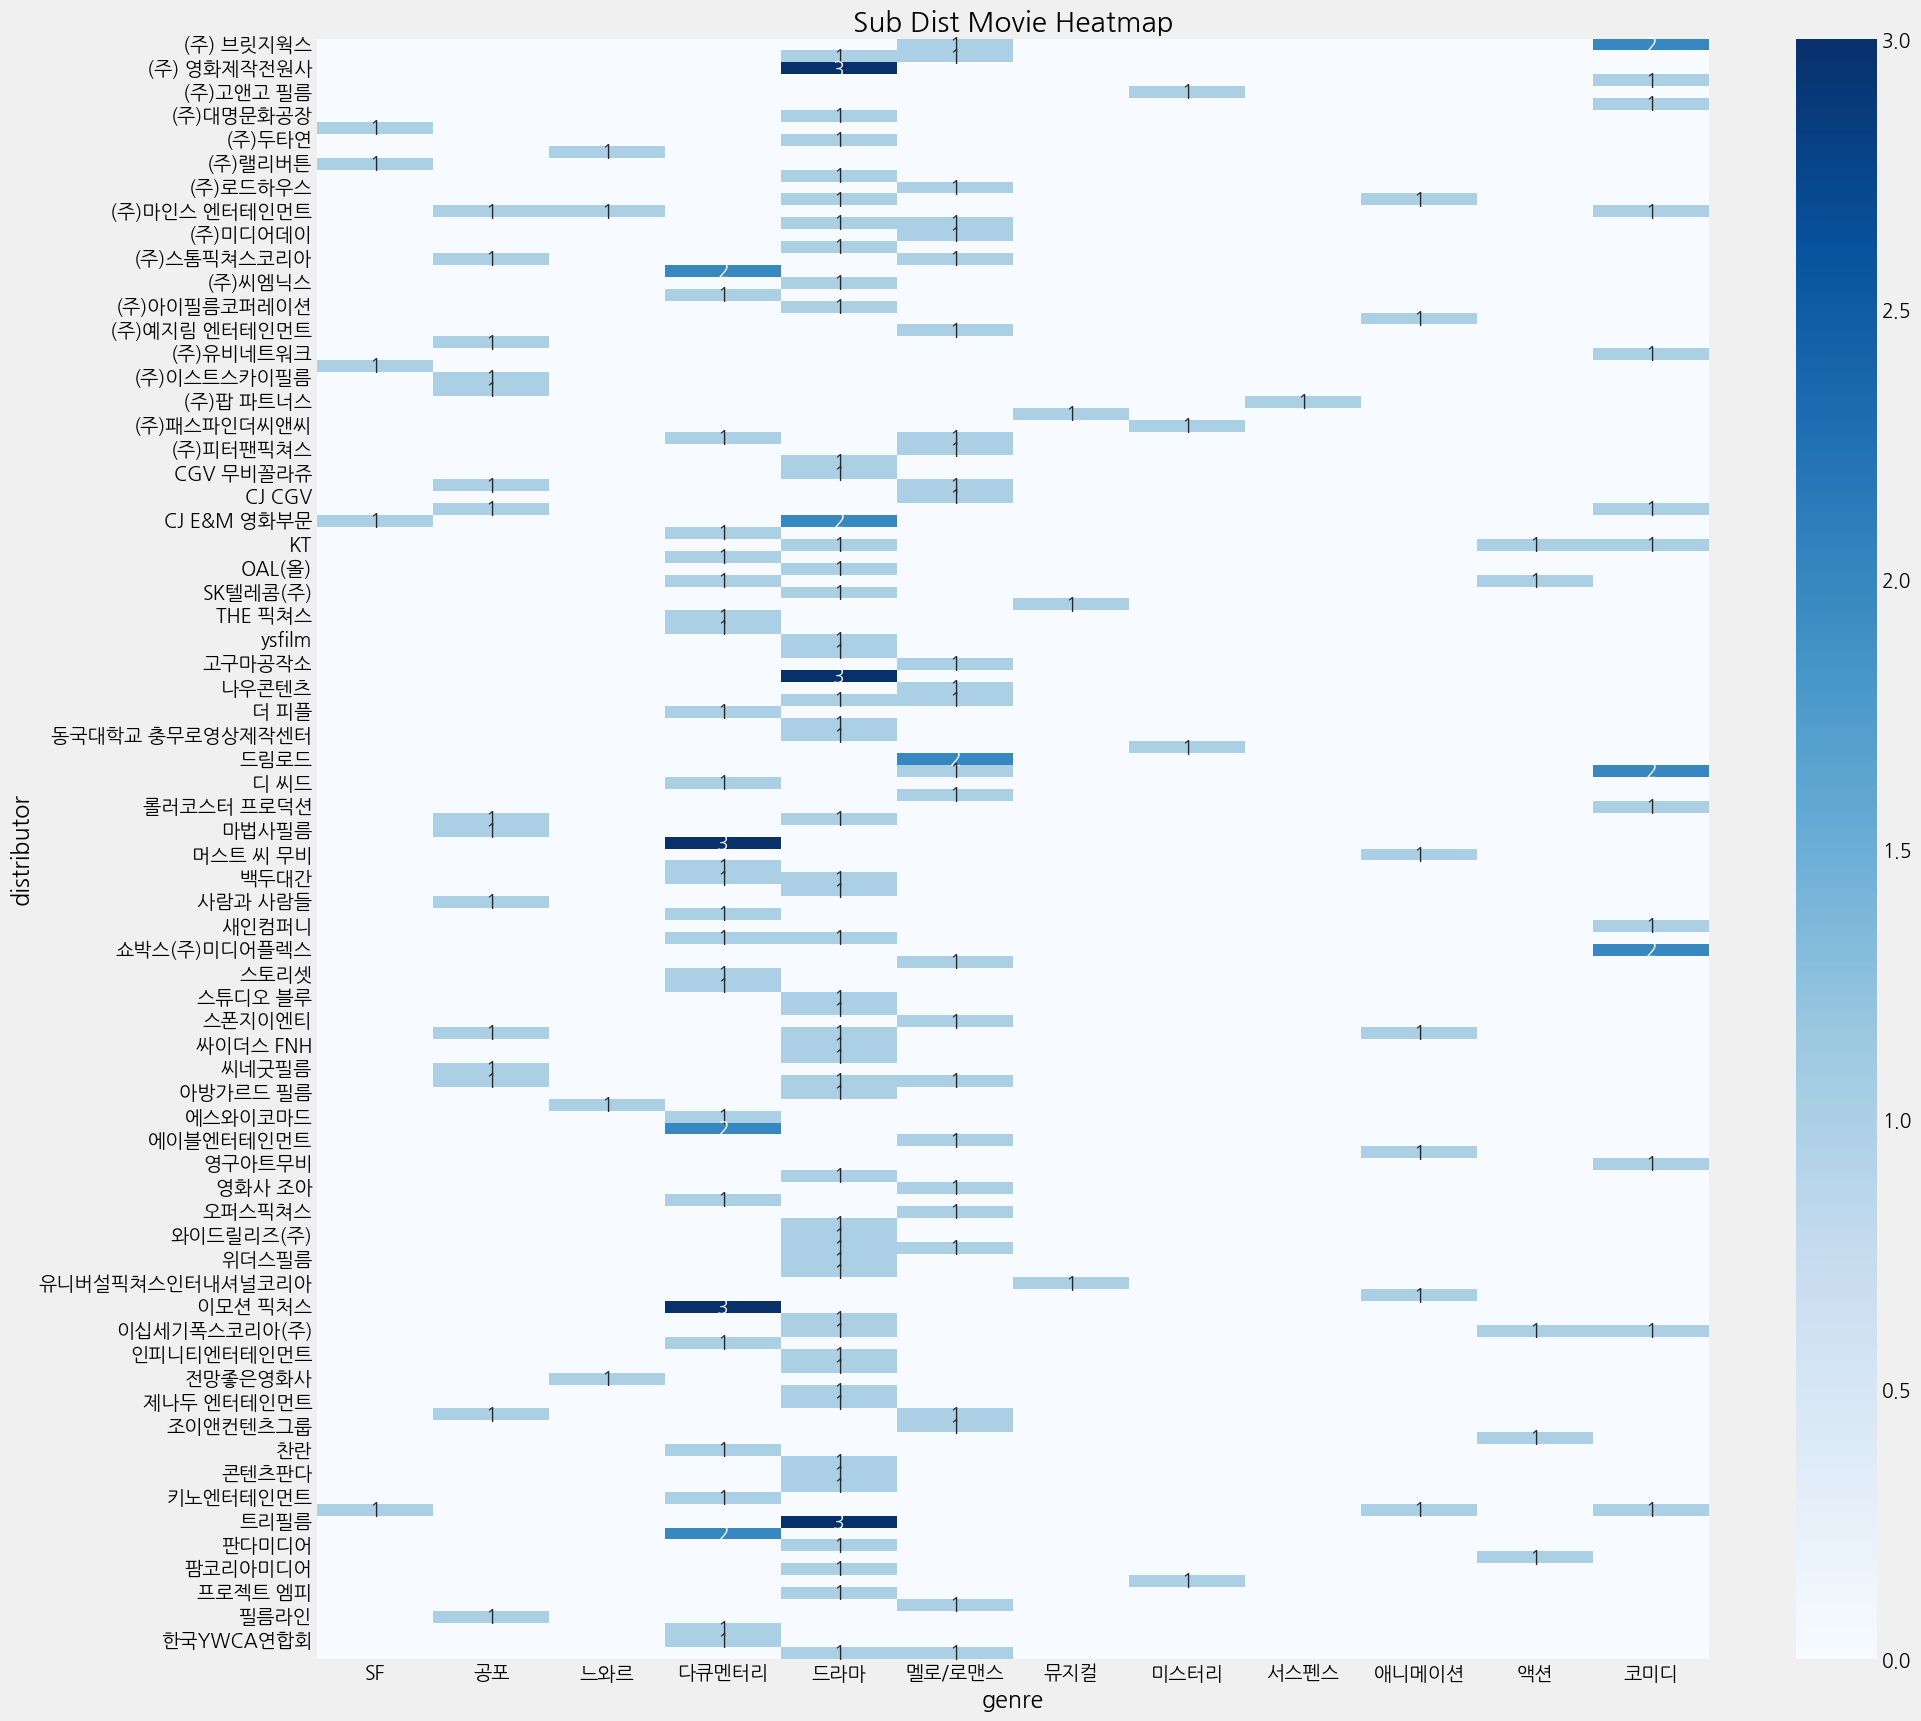

In [38]:
plt.figure(figsize=(20,20))
annot_data = np.where(sub_dist_genre_pivot == 0, '', sub_dist_genre_pivot)
sns.heatmap(sub_dist_genre_pivot, annot=annot_data, fmt='', cmap='Blues')
plt.title("Sub Dist Movie Heatmap")
plt.show()


## 자료가 너무 많아서 0이 모두 출력될 경우, 그래프가 가시성이 너무 떨어짐 --> 0은 문자열로 바꿔 출력하지 않는 옵션 적용
## 0인 값을 문자열로 바꿔 출력했기 때문에, fmt에 'd'라는 정수형이 아닌 ''가 들어가야 한다! 
## https://dsbook.tistory.com/51 참고

## 히트맵의 y축, x축 바꾸는 방법 ---> 전치 행렬을 기반으로 적용하면 된다!! 
##sub_dist_genre_pivot_T = sub_dist_genre_pivot.T

### 결과 해석 :
1. CJ, 롯데
    * 가장 많은 영화를 배급하는 CJ와 롯데의 경우 메인으로 밀고 있는 장르 = 드라마
    * 그 외 다양한 장르에도 횟수가 많지는 않으나 배급하는 모습을 보임(꾸준한 건지는 각 배급사 개별 데이터를 확인할 필요성 있음)
* 특히 롯데의 경우 대부분의 코미디 영화를 배급했다는 점이 인상적
  
2. NEW, 마운틴 픽쳐스
    * NEW, 마운틴 픽쳐스의 경우 유사하게 드라마 장르를 가장 많이 배급함.
    * 그러나 NEW의 경우 드라마 장르에 치중한 모습, 마운틴 픽쳐스의 경우 그나마 다양한 장르로 분산 배급하는 모습을 보임

3. 쇼박스, 인디스토리
     * 쇼박스와 인디스토리는 선택과 집중을 명확하게 보여준다. 그러나 배급하는 장르에서 약간의 차이가 있다.
        A. 쇼박스의 경우 드라마 장르와 느와르 장르, 액션 장르를 주로 배급
        B. 인디스토리의 경우 드라마 장르와 다큐멘터리 장르를 주로 배급
        * 특히 느와르 장르의 경우 대부분의 경우가 쇼박스에서 배급했다는 사실이 인상적

4. 시네마달

* 1건을 제외하고는 모두 다큐멘터리를 배급한다는 점이 인상적 --> 선택과 집중 전략이 아니라 아예 다큐멘터리 전문 배급사인 것으로 보임

5. 그외

* 골든타이드픽처스(눈에 띄는 점 보이지 않음)
* 케이알씨지 : 2건 제외하고 모두 멜로 로맨스 장르
* 영화사 조제 : 드라마 장르에 집중 (3건 제외하고 모두 드라마 장르)

#### 대형 배급사의 경우
A. 메인으로 미는 장르가 있으나, 다양한 장르를 배급하는 모습이 나타남

#### 중형~소형 배급사의 경우
A. 선택과 집중 전략
B. 소규모 배급 + 여러 장르
C. 소규모는 아니지만 특정 장르만 배급 (흥행할 확률이 큰 장르)

#### 서브 배급사 (배급 횟수 3회 이하)
* 영화 배급 횟수 3회 이하 : sub_dist (count만 있음)
* 한 배급사가 배급하는 영화가 약 2~3개인 경우가 대다수. 배급하는 장르가 많지 않다.

### 각 배급사별 배급 패턴 체크
genre release_time : 시기별 정보 확인 box_of_num : 흥행 정도 파악 num_staff : 제작 규모 가늠

위 4가지 칼럼을 이용해 각 제작사별 패턴을 확인


In [39]:
CJ_Lotte = train[(train['distributor'] == '롯데엔터테인먼트') | (train['distributor'] == 'CJ 엔터테인먼트')]

In [40]:
print(CJ_Lotte.sort_values(by=['box_off_num']))

            title distributor  genre release_time  time screening_rat  \
133            심도   CJ 엔터테인먼트    드라마   2011-03-17   121      청소년 관람불가   
312             집   CJ 엔터테인먼트  애니메이션   2011-03-17    83       15세 관람가   
404      태어나서 미안해   CJ 엔터테인먼트    드라마   2012-03-08    80       15세 관람가   
416           은실이   CJ 엔터테인먼트  애니메이션   2012-03-08    71      청소년 관람불가   
403            설인   CJ 엔터테인먼트     SF   2013-03-14    91      청소년 관람불가   
..            ...         ...    ...          ...   ...           ...   
476        수상한 그녀   CJ 엔터테인먼트    코미디   2014-01-22   124       15세 관람가   
505  해적: 바다로 간 산적    롯데엔터테인먼트     SF   2014-08-06   130       12세 관람가   
496          설국열차   CJ 엔터테인먼트     SF   2013-08-01   125       15세 관람가   
460   광해, 왕이 된 남자   CJ 엔터테인먼트    드라마   2012-09-13   131       15세 관람가   
372          국제시장   CJ 엔터테인먼트    드라마   2014-12-17   126       12세 관람가   

     director  dir_prev_bfnum  dir_prev_num  num_staff  num_actor  box_off_num  
133  하마구치 류스케    0.000000e+00             

In [41]:
CJ_data = CJ_Lotte[CJ_Lotte['distributor'] == 'CJ 엔터테인먼트']
sort_CJ_data=CJ_data.sort_values(by=['release_time'], ascending=True)


lotte_data = CJ_Lotte[CJ_Lotte['distributor'] == '롯데엔터테인먼트']
sort_lotte_data=lotte_data.sort_values(by=['release_time'], ascending=True)

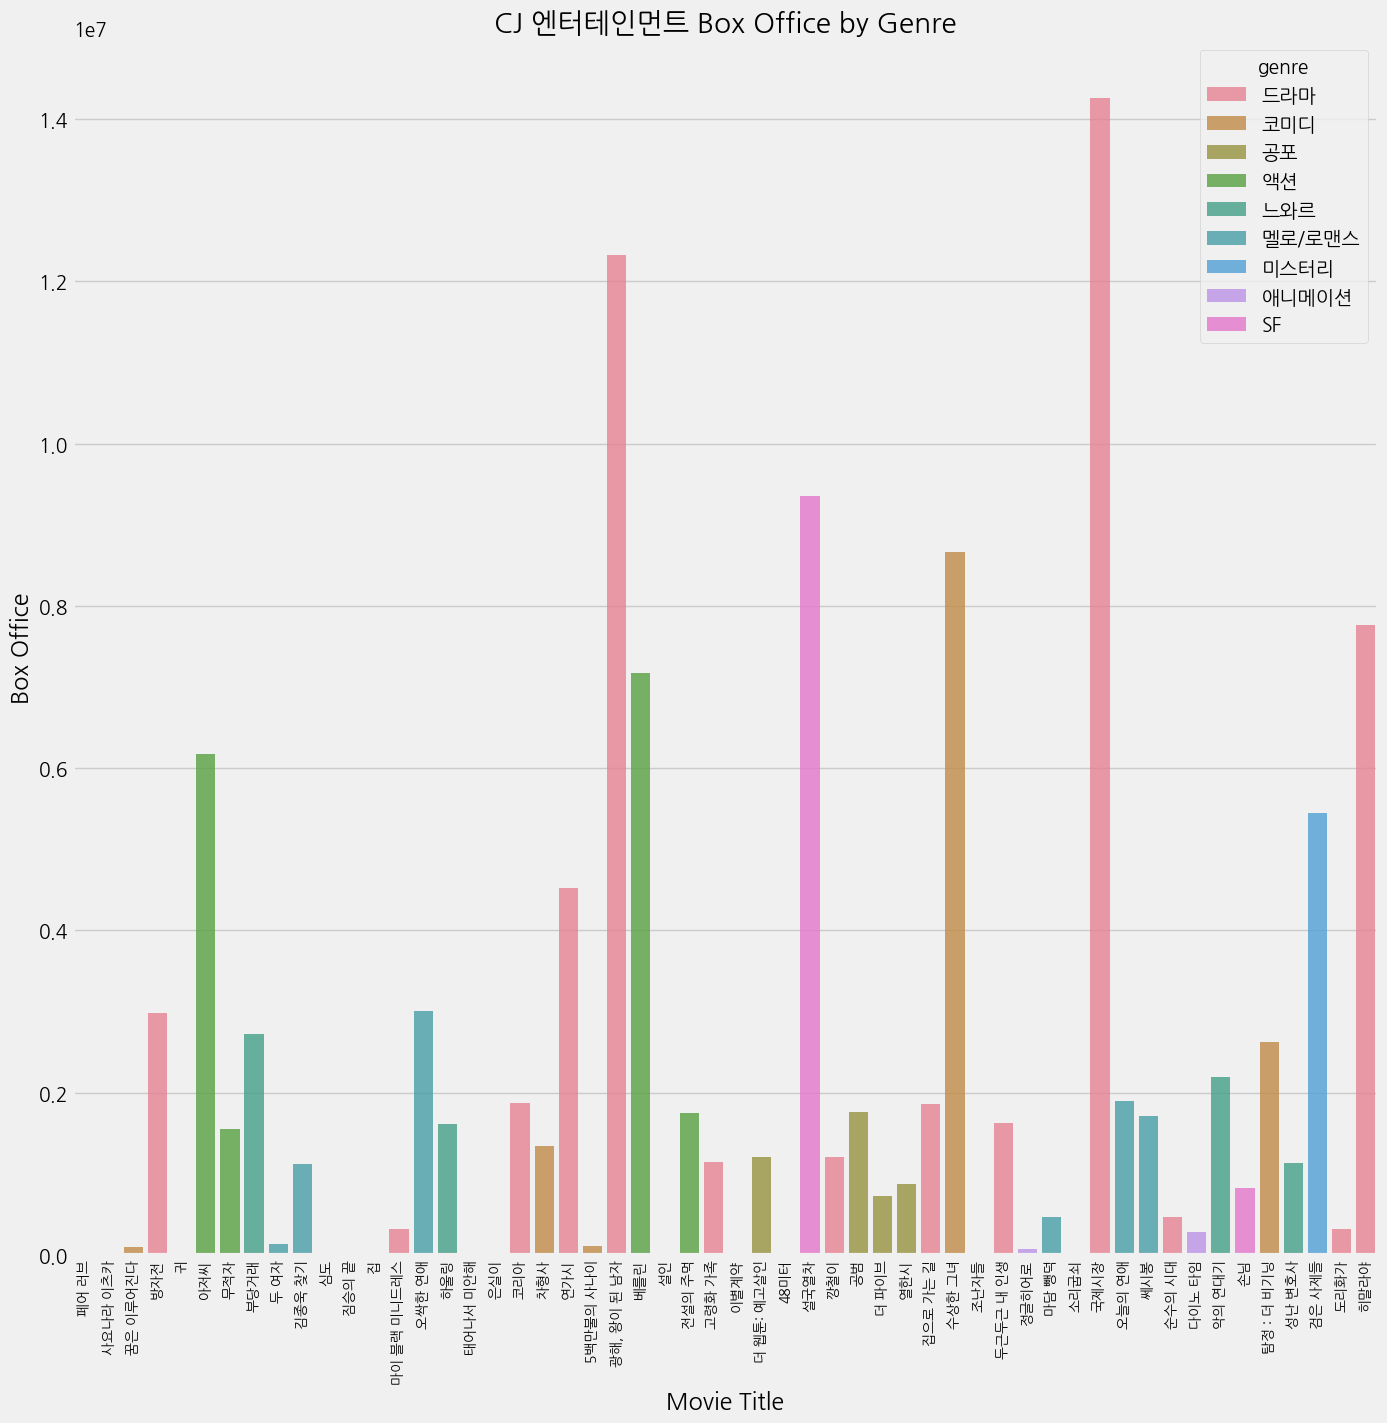

In [42]:
plt.figure(figsize=(15,15))
sns.barplot(x='title', y='box_off_num', hue='genre', data=sort_CJ_data, alpha=0.8)
plt.title('CJ 엔터테인먼트 Box Office by Genre')
plt.xlabel('Movie Title')
plt.ylabel('Box Office')
plt.xticks(rotation=90, fontsize=10);

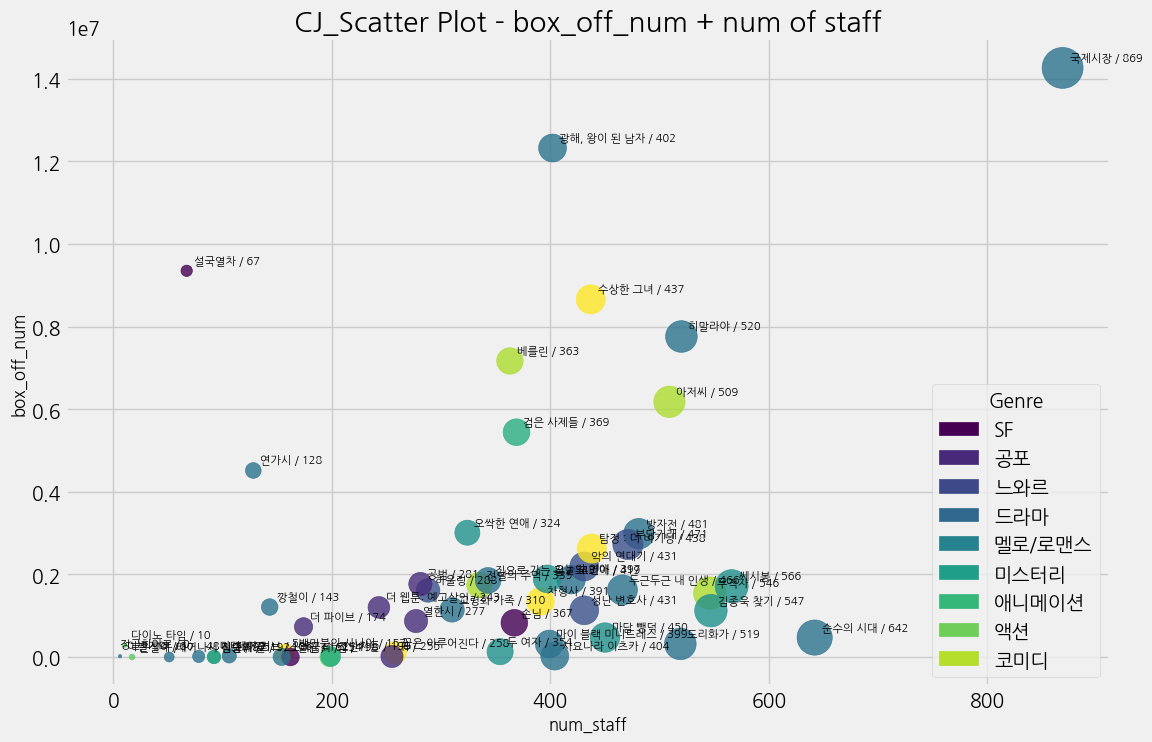

In [43]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.patches as mpatches

plt.figure(figsize=(12,8))

le = LabelEncoder()
sort_CJ_data['genre_code'] = le.fit_transform(sort_CJ_data['genre'])

plt.scatter(sort_CJ_data['num_staff'], sort_CJ_data['box_off_num'], s=sort_CJ_data['num_staff'], c=sort_CJ_data['genre_code'], cmap='viridis', alpha=0.8)
## genre가 문자열 정보임. 범주형 변수로 변환하지 않아서 해당 정보를 바로 C랑 연결지으면 오류가 생김. --> 범주형 변수화 필요 (Label encoding 이용)

plt.xlabel("num_staff", fontsize=12)
plt.ylabel("box_off_num", fontsize=12)
plt.title('CJ_Scatter Plot - box_off_num + num of staff')

cmap = plt.get_cmap('viridis')    ## 위에서 사용한 컬러맵 가져옴
unique_codes = range(len(le.classes_)) ## le.classes = Label encoding 후 결과 가지고 있는 클래스! 

handles = [
    mpatches.Patch(color=cmap(code / len(le.classes_)), label=genre)
    ## legend에 표시되는 색상 블록 생성.
    ## code = 장르의 인코딩 값! 
    
    for code, genre in zip(unique_codes, le.classes_)
    ##zip = 여러개의 반복 가능한 객체를 순회하면서 동일한 인덱스의 요소를 하나로 묶어주는 함수!! 
]

plt.legend(handles=handles, title="Genre")


for idx, row in sort_CJ_data.iterrows():
    label_text = f"{row['title']} / {row['num_staff']}"
    # 각 데이터 포인트 좌표에 약간의 오프셋을 주어 텍스트가 겹치지 않도록 함
    plt.annotate(label_text, (row['num_staff'], row['box_off_num']), textcoords="offset points", xytext=(5, 5), fontsize=8, color='black')

plt.show()

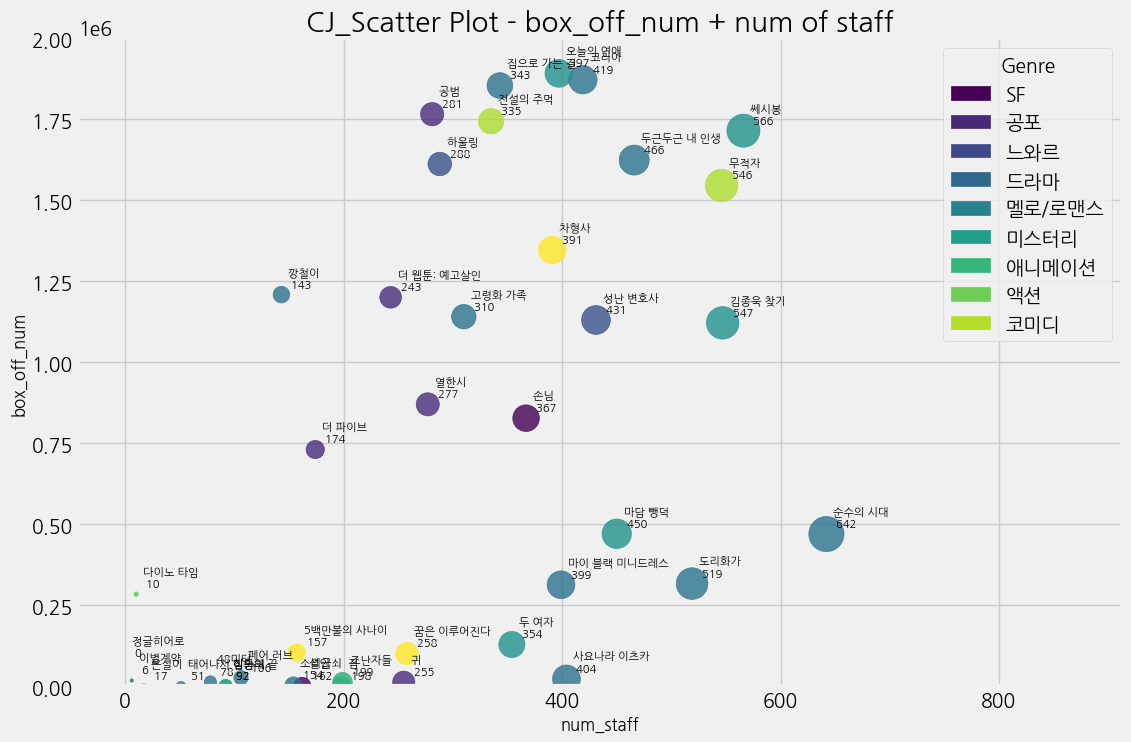

In [44]:
plt.figure(figsize=(12,8))

plt.scatter(sort_CJ_data['num_staff'], sort_CJ_data['box_off_num'], s=sort_CJ_data['num_staff'], c=sort_CJ_data['genre_code'], cmap='viridis', alpha=0.8)
## genre가 문자열 정보임. 범주형 변수로 변환하지 않아서 해당 정보를 바로 C랑 연결지으면 오류가 생김. --> 범주형 변수화 필요 (Label encoding 이용)

plt.xlabel("num_staff", fontsize=12)
plt.ylabel("box_off_num", fontsize=12)
plt.title('CJ_Scatter Plot - box_off_num + num of staff')

cmap = plt.get_cmap('viridis')    ## 위에서 사용한 컬러맵 가져옴
unique_codes = range(len(le.classes_)) ## le.classes = Label encoding 후 결과 가지고 있는 클래스! 

handles = [
    mpatches.Patch(color=cmap(code / len(le.classes_)), label=genre)
    ## legend에 표시되는 색상 블록 생성.
    ## code = 장르의 인코딩 값! 
    
    for code, genre in zip(unique_codes, le.classes_)
    ##zip = 여러개의 반복 가능한 객체를 순회하면서 동일한 인덱스의 요소를 하나로 묶어주는 함수!! 
]

plt.legend(handles=handles, title="Genre")


for idx, row in sort_CJ_data.iterrows():
    label_text = f"{row['title']} \n {row['num_staff']}"
    # 각 데이터 포인트 좌표에 약간의 오프셋을 주어 텍스트가 겹치지 않도록 함
    plt.annotate(label_text, (row['num_staff'], row['box_off_num']), textcoords="offset points", xytext=(5, 5), fontsize=8, color='black')


plt.ylim(0, 0.2*1e7)
plt.show()

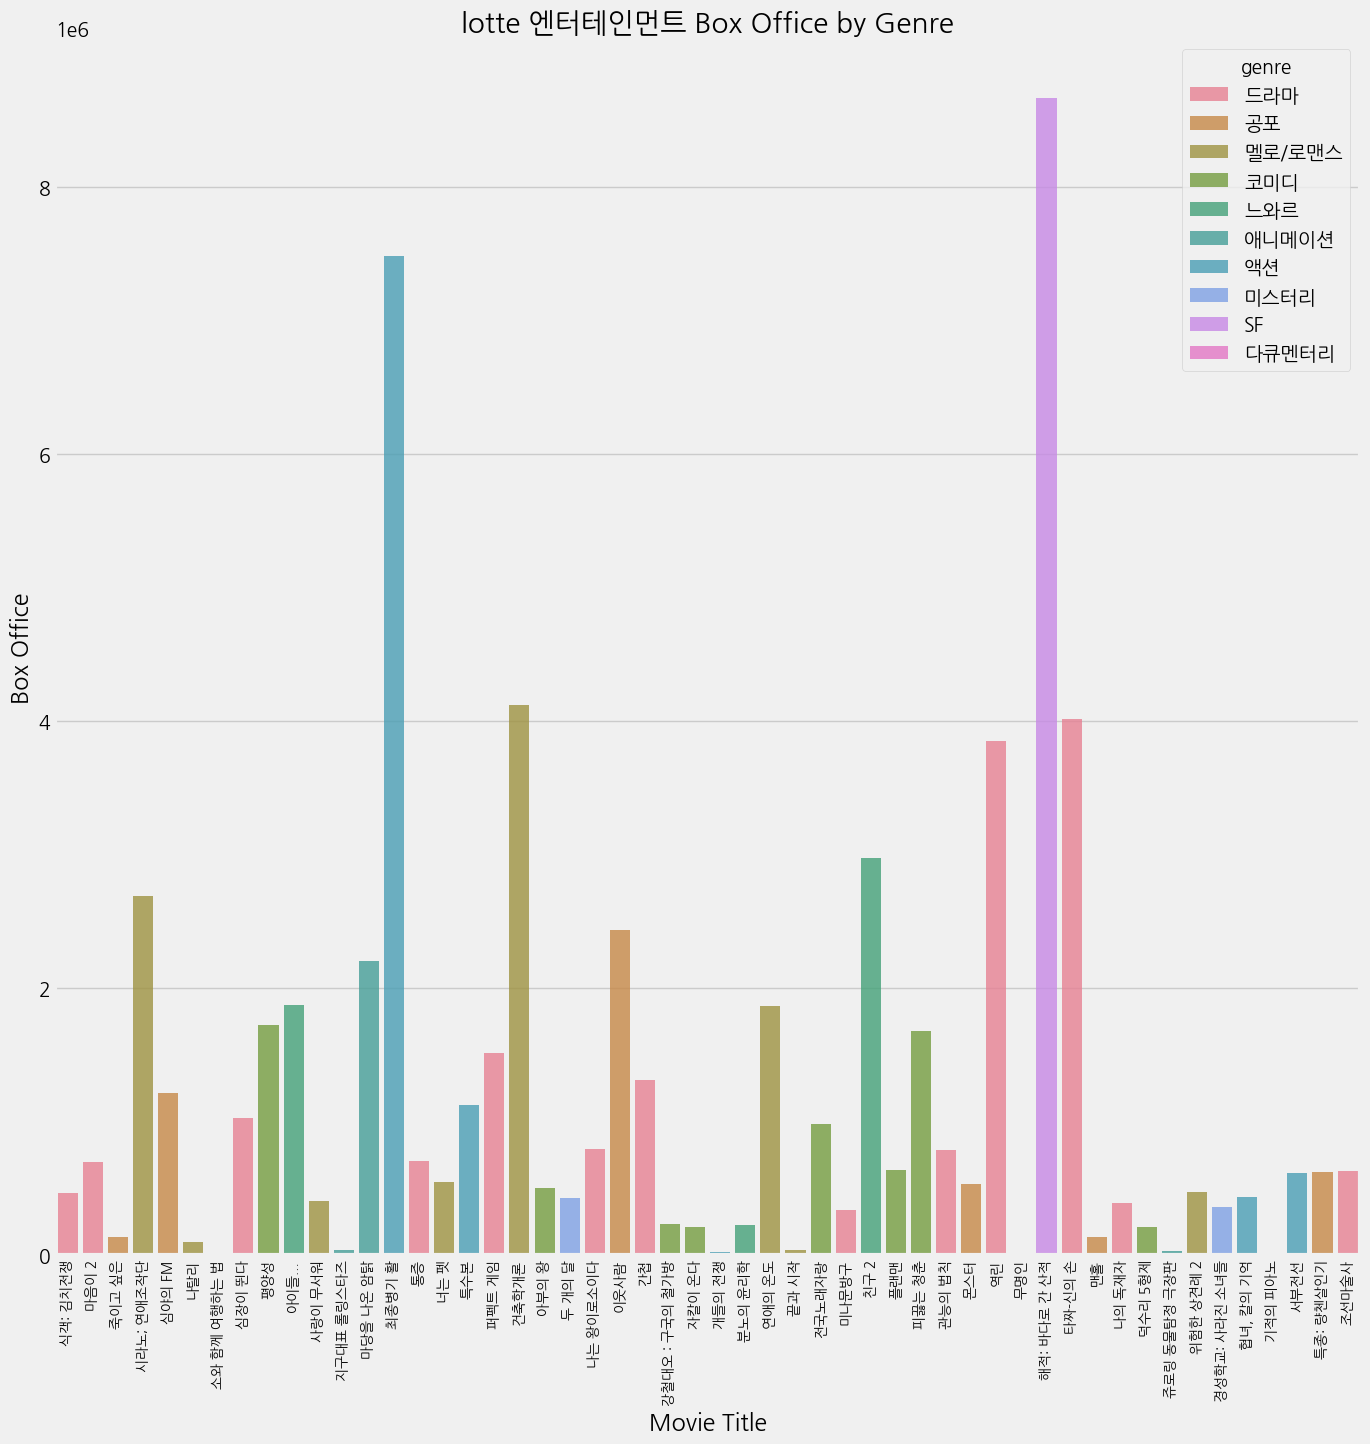

In [45]:
plt.figure(figsize=(15,15))
sns.barplot(x='title', y='box_off_num', hue='genre', data=sort_lotte_data, alpha=0.8)
plt.title('lotte 엔터테인먼트 Box Office by Genre')
plt.xlabel('Movie Title')
plt.ylabel('Box Office')
plt.xticks(rotation=90, fontsize=10);


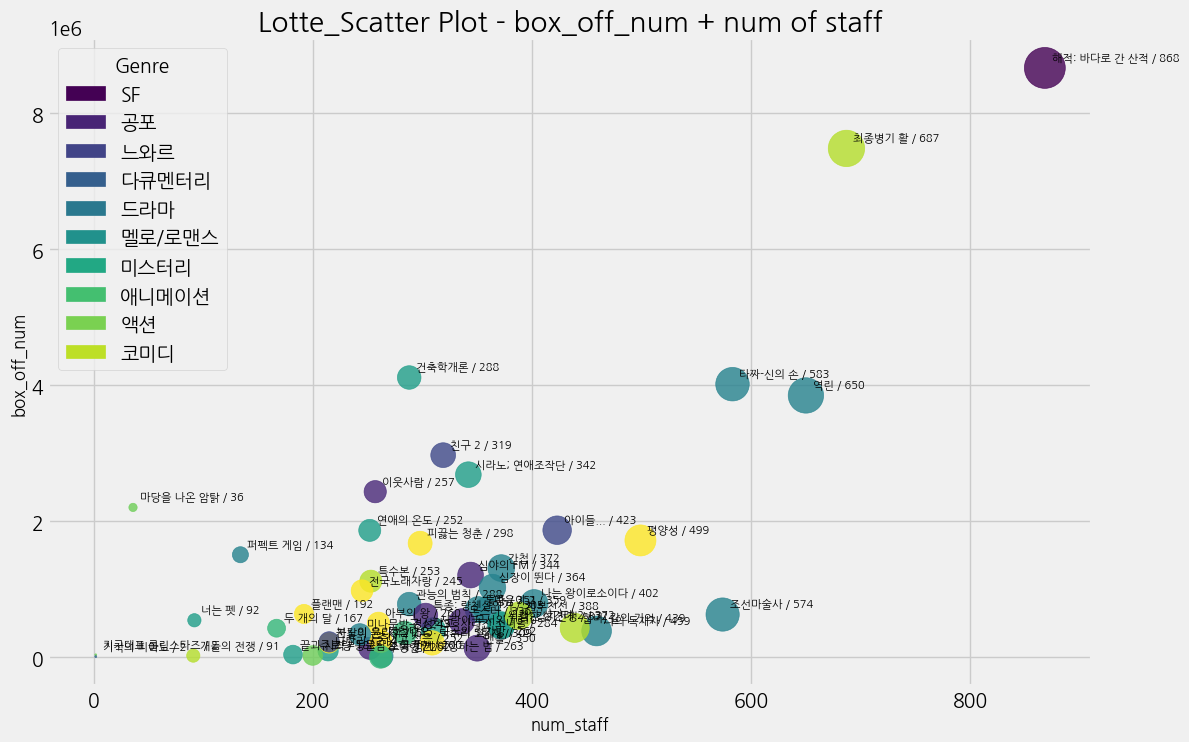

In [46]:
plt.figure(figsize=(12,8))

le1 = LabelEncoder()
sort_lotte_data['genre_code'] = le1.fit_transform(sort_lotte_data['genre'])

plt.scatter(sort_lotte_data['num_staff'], sort_lotte_data['box_off_num'], s=sort_lotte_data['num_staff'], c=sort_lotte_data['genre_code'], cmap='viridis', alpha=0.8)
## genre가 문자열 정보임. 범주형 변수로 변환하지 않아서 해당 정보를 바로 C랑 연결지으면 오류가 생김. --> 범주형 변수화 필요 (Label encoding 이용)

plt.xlabel("num_staff", fontsize=12)
plt.ylabel("box_off_num", fontsize=12)
plt.title('Lotte_Scatter Plot - box_off_num + num of staff')

cmap1 = plt.get_cmap('viridis')    ## 위에서 사용한 컬러맵 가져옴
unique_codes1 = range(len(le1.classes_)) ## le.classes = Label encoding 후 결과 가지고 있는 클래스! 

handles1 = [
    mpatches.Patch(color=cmap1(code / len(le1.classes_)), label=genre)
    ## legend에 표시되는 색상 블록 생성.
    ## code = 장르의 인코딩 값! 
    
    for code, genre in zip(unique_codes1, le1.classes_)
    ##zip = 여러개의 반복 가능한 객체를 순회하면서 동일한 인덱스의 요소를 하나로 묶어주는 함수!! 
]

plt.legend(handles=handles1, title="Genre")


for idx, row in sort_lotte_data.iterrows():
    label_text = f"{row['title']} / {row['num_staff']}"
    # 각 데이터 포인트 좌표에 약간의 오프셋을 주어 텍스트가 겹치지 않도록 함
    plt.annotate(label_text, (row['num_staff'], row['box_off_num']), textcoords="offset points", xytext=(5, 5), fontsize=8, color='black')

plt.show()


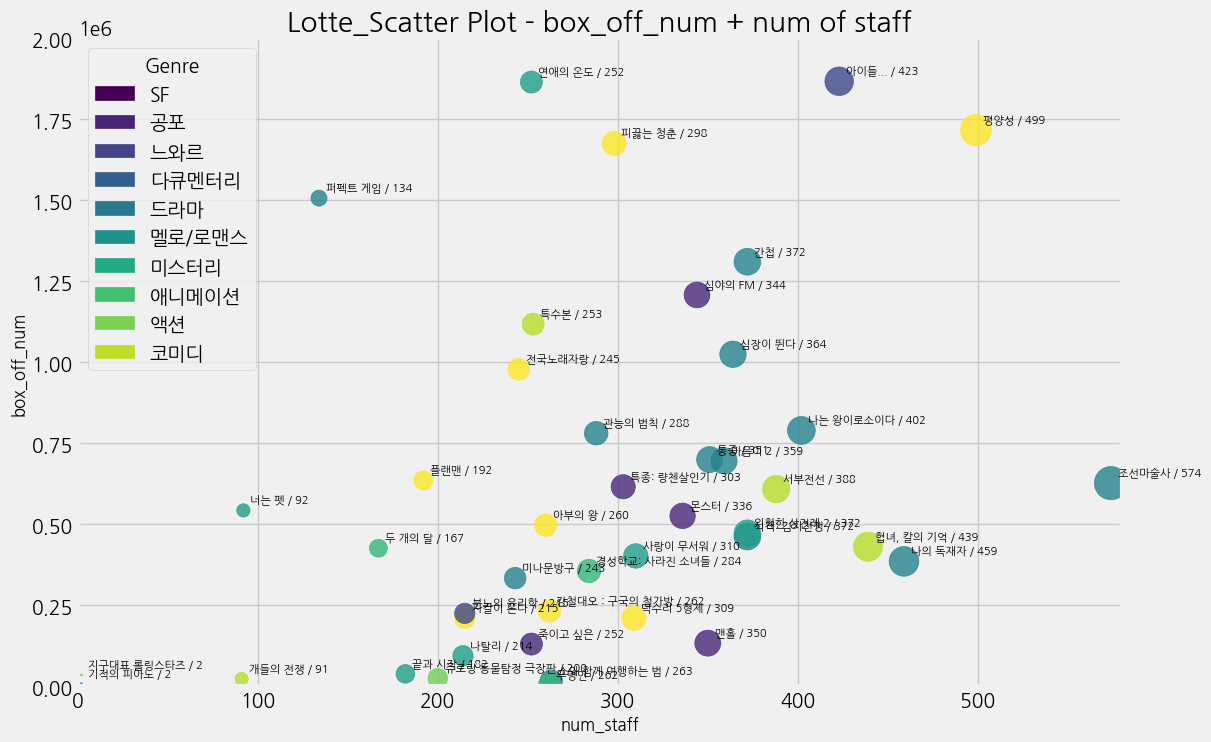

In [47]:
plt.figure(figsize=(12,8))


plt.scatter(sort_lotte_data['num_staff'], sort_lotte_data['box_off_num'], s=sort_lotte_data['num_staff'], c=sort_lotte_data['genre_code'], cmap='viridis', alpha=0.8)
## genre가 문자열 정보임. 범주형 변수로 변환하지 않아서 해당 정보를 바로 C랑 연결지으면 오류가 생김. --> 범주형 변수화 필요 (Label encoding 이용)

plt.xlabel("num_staff", fontsize=12)
plt.ylabel("box_off_num", fontsize=12)
plt.title('Lotte_Scatter Plot - box_off_num + num of staff')

cmap1 = plt.get_cmap('viridis')    ## 위에서 사용한 컬러맵 가져옴
unique_codes1 = range(len(le1.classes_)) ## le.classes = Label encoding 후 결과 가지고 있는 클래스! 

handles1 = [
    mpatches.Patch(color=cmap1(code / len(le1.classes_)), label=genre)
    ## legend에 표시되는 색상 블록 생성.
    ## code = 장르의 인코딩 값! 
    
    for code, genre in zip(unique_codes1, le1.classes_)
    ##zip = 여러개의 반복 가능한 객체를 순회하면서 동일한 인덱스의 요소를 하나로 묶어주는 함수!! 
]

plt.legend(handles=handles1, title="Genre")


for idx, row in sort_lotte_data.iterrows():
    label_text = f"{row['title']} / {row['num_staff']}"
    # 각 데이터 포인트 좌표에 약간의 오프셋을 주어 텍스트가 겹치지 않도록 함
    plt.annotate(label_text, (row['num_staff'], row['box_off_num']), textcoords="offset points", xytext=(5, 5), fontsize=8, color='black')

plt.ylim(0, 2*1e6)
plt.xlim(0, 580)
plt.show()


In [48]:

NEW_data = train[(train['distributor'] == 'NEW') | (train['distributor'] == '(주)NEW')]
sort_NEW_data=NEW_data.sort_values(by=['release_time'], ascending=True)

MT_data = train[(train['distributor'] == '(주)마운틴픽쳐스')]
sort_MT_data=MT_data.sort_values(by=['release_time'], ascending=True)

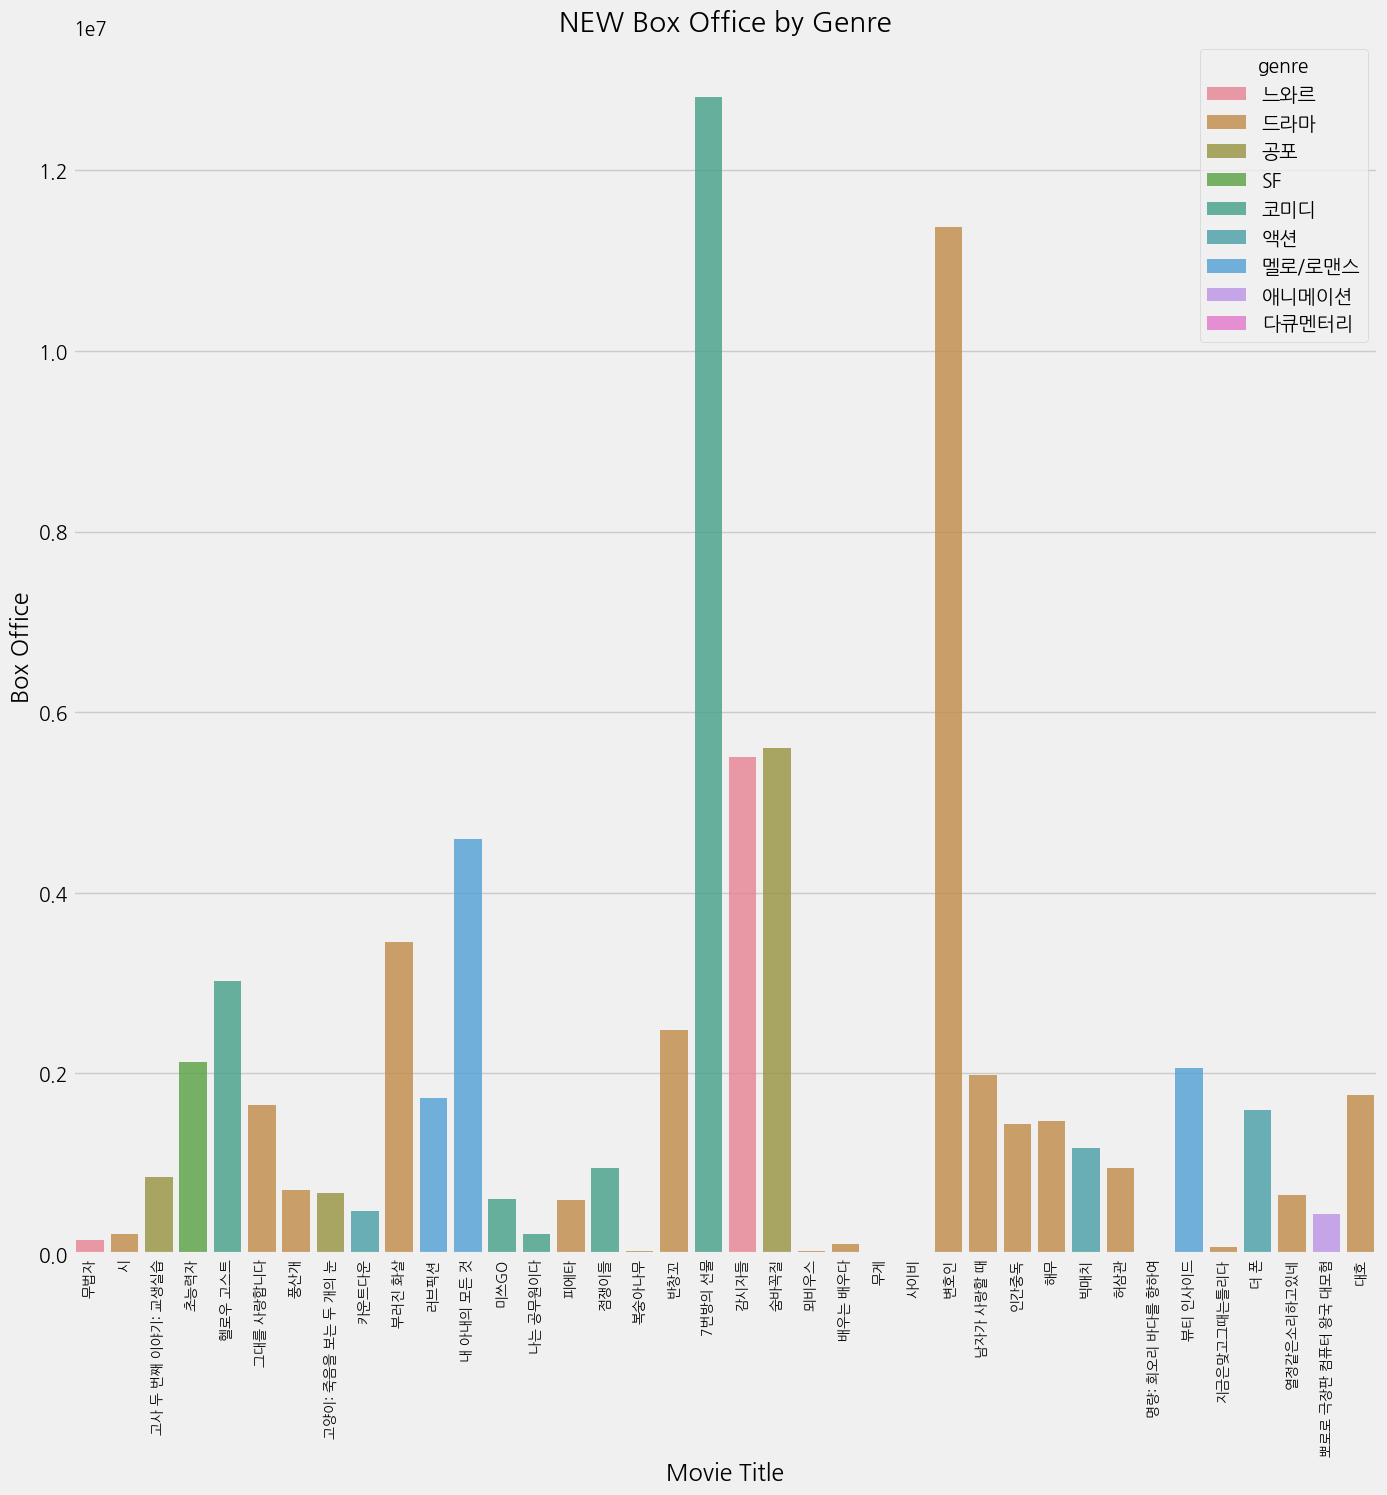

In [49]:
plt.figure(figsize=(15,15))
sns.barplot(x='title', y='box_off_num', hue='genre', data=sort_NEW_data, alpha=0.8)
plt.title('NEW Box Office by Genre')
plt.xlabel('Movie Title')
plt.ylabel('Box Office')
plt.xticks(rotation=90, fontsize=10);

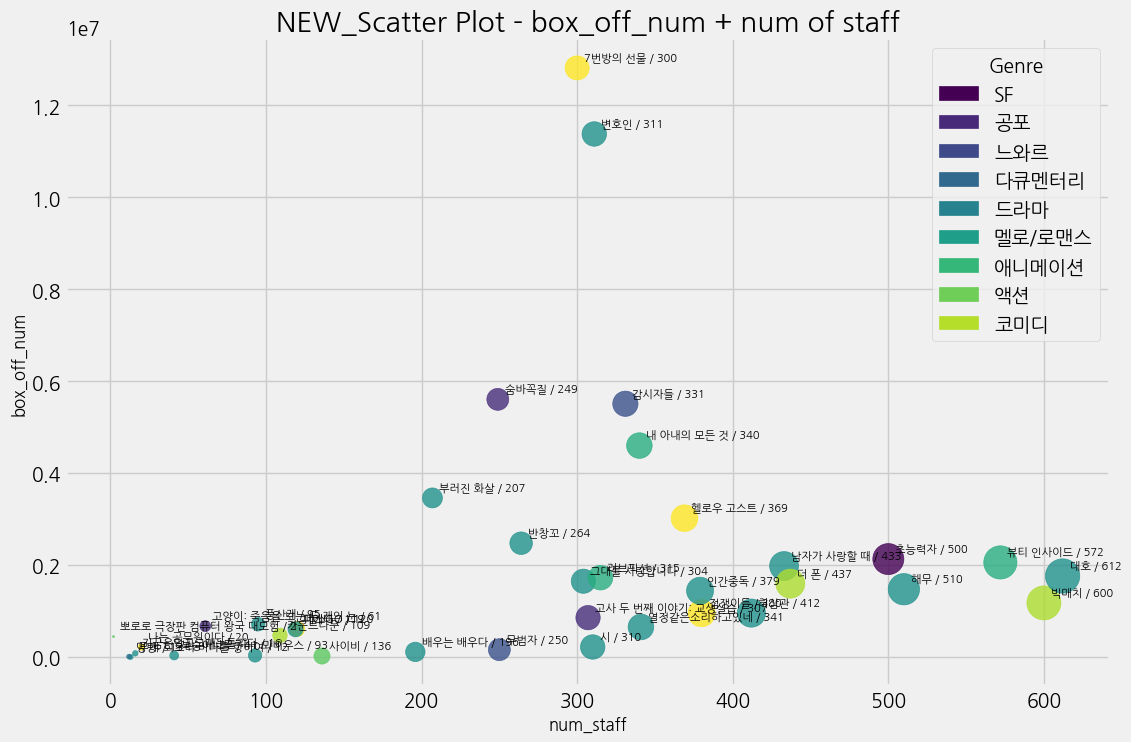

In [50]:
plt.figure(figsize=(12,8))

le2 = LabelEncoder()
sort_NEW_data['genre_code'] = le2.fit_transform(sort_NEW_data['genre'])

plt.scatter(sort_NEW_data['num_staff'], sort_NEW_data['box_off_num'], s=sort_NEW_data['num_staff'], c=sort_NEW_data['genre_code'], cmap='viridis', alpha=0.8)
## genre가 문자열 정보임. 범주형 변수로 변환하지 않아서 해당 정보를 바로 C랑 연결지으면 오류가 생김. --> 범주형 변수화 필요 (Label encoding 이용)

plt.xlabel("num_staff", fontsize=12)
plt.ylabel("box_off_num", fontsize=12)
plt.title('NEW_Scatter Plot - box_off_num + num of staff')

cmap2 = plt.get_cmap('viridis')    ## 위에서 사용한 컬러맵 가져옴
unique_codes2 = range(len(le2.classes_)) ## le.classes = Label encoding 후 결과 가지고 있는 클래스! 

handles2 = [
    mpatches.Patch(color=cmap2(code / len(le2.classes_)), label=genre)
    ## legend에 표시되는 색상 블록 생성.
    ## code = 장르의 인코딩 값! 
    
    for code, genre in zip(unique_codes2, le2.classes_)
    ##zip = 여러개의 반복 가능한 객체를 순회하면서 동일한 인덱스의 요소를 하나로 묶어주는 함수!! 
]

plt.legend(handles=handles2, title="Genre")


for idx, row in sort_NEW_data.iterrows():
    label_text = f"{row['title']} / {row['num_staff']}"
    # 각 데이터 포인트 좌표에 약간의 오프셋을 주어 텍스트가 겹치지 않도록 함
    plt.annotate(label_text, (row['num_staff'], row['box_off_num']), textcoords="offset points", xytext=(5, 5), fontsize=8, color='black')

plt.show()


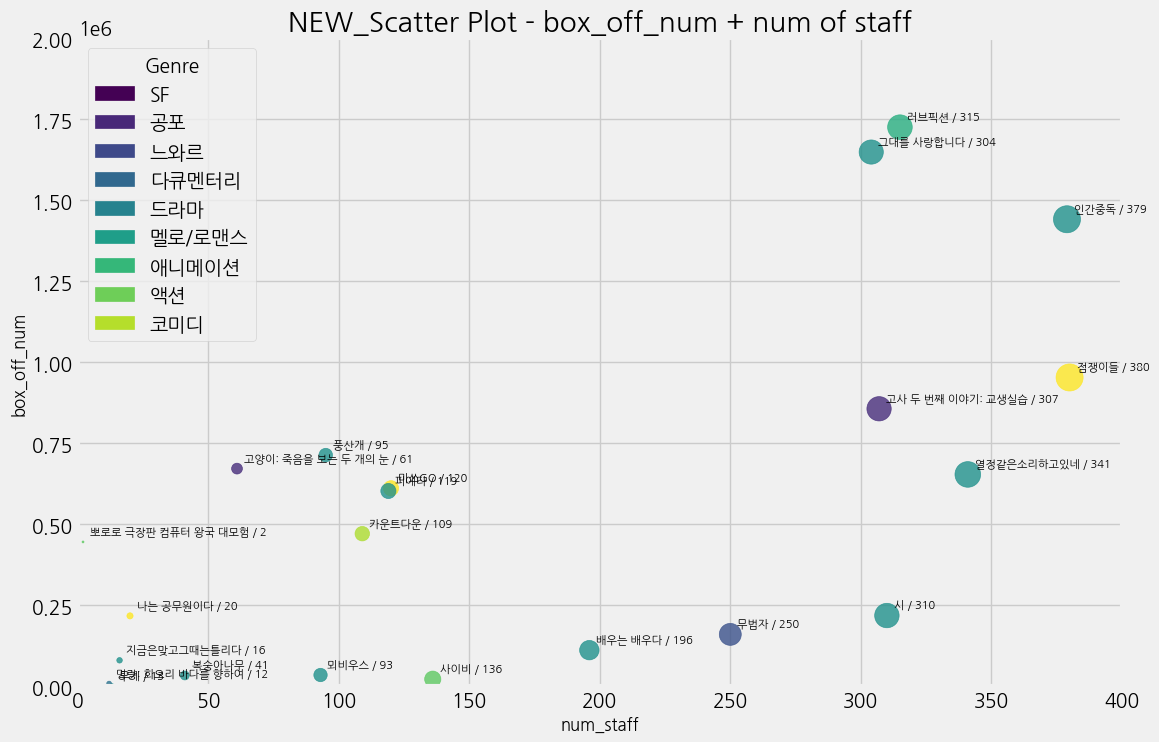

In [51]:
plt.figure(figsize=(12,8))

plt.scatter(sort_NEW_data['num_staff'], sort_NEW_data['box_off_num'], s=sort_NEW_data['num_staff'], c=sort_NEW_data['genre_code'], cmap='viridis', alpha=0.8)
## genre가 문자열 정보임. 범주형 변수로 변환하지 않아서 해당 정보를 바로 C랑 연결지으면 오류가 생김. --> 범주형 변수화 필요 (Label encoding 이용)

plt.xlabel("num_staff", fontsize=12)
plt.ylabel("box_off_num", fontsize=12)
plt.title('NEW_Scatter Plot - box_off_num + num of staff')

cmap2 = plt.get_cmap('viridis')    ## 위에서 사용한 컬러맵 가져옴
unique_codes2 = range(len(le2.classes_)) ## le.classes = Label encoding 후 결과 가지고 있는 클래스! 

handles2 = [
    mpatches.Patch(color=cmap2(code / len(le2.classes_)), label=genre)
    ## legend에 표시되는 색상 블록 생성.
    ## code = 장르의 인코딩 값! 
    
    for code, genre in zip(unique_codes2, le2.classes_)
    ##zip = 여러개의 반복 가능한 객체를 순회하면서 동일한 인덱스의 요소를 하나로 묶어주는 함수!! 
]

plt.legend(handles=handles2, title="Genre")


for idx, row in sort_NEW_data.iterrows():
    label_text = f"{row['title']} / {row['num_staff']}"
    # 각 데이터 포인트 좌표에 약간의 오프셋을 주어 텍스트가 겹치지 않도록 함
    plt.annotate(label_text, (row['num_staff'], row['box_off_num']), textcoords="offset points", xytext=(5, 5), fontsize=8, color='black')

plt.ylim(0, 0.2*1e7)
plt.xlim(0, 400)
plt.show()

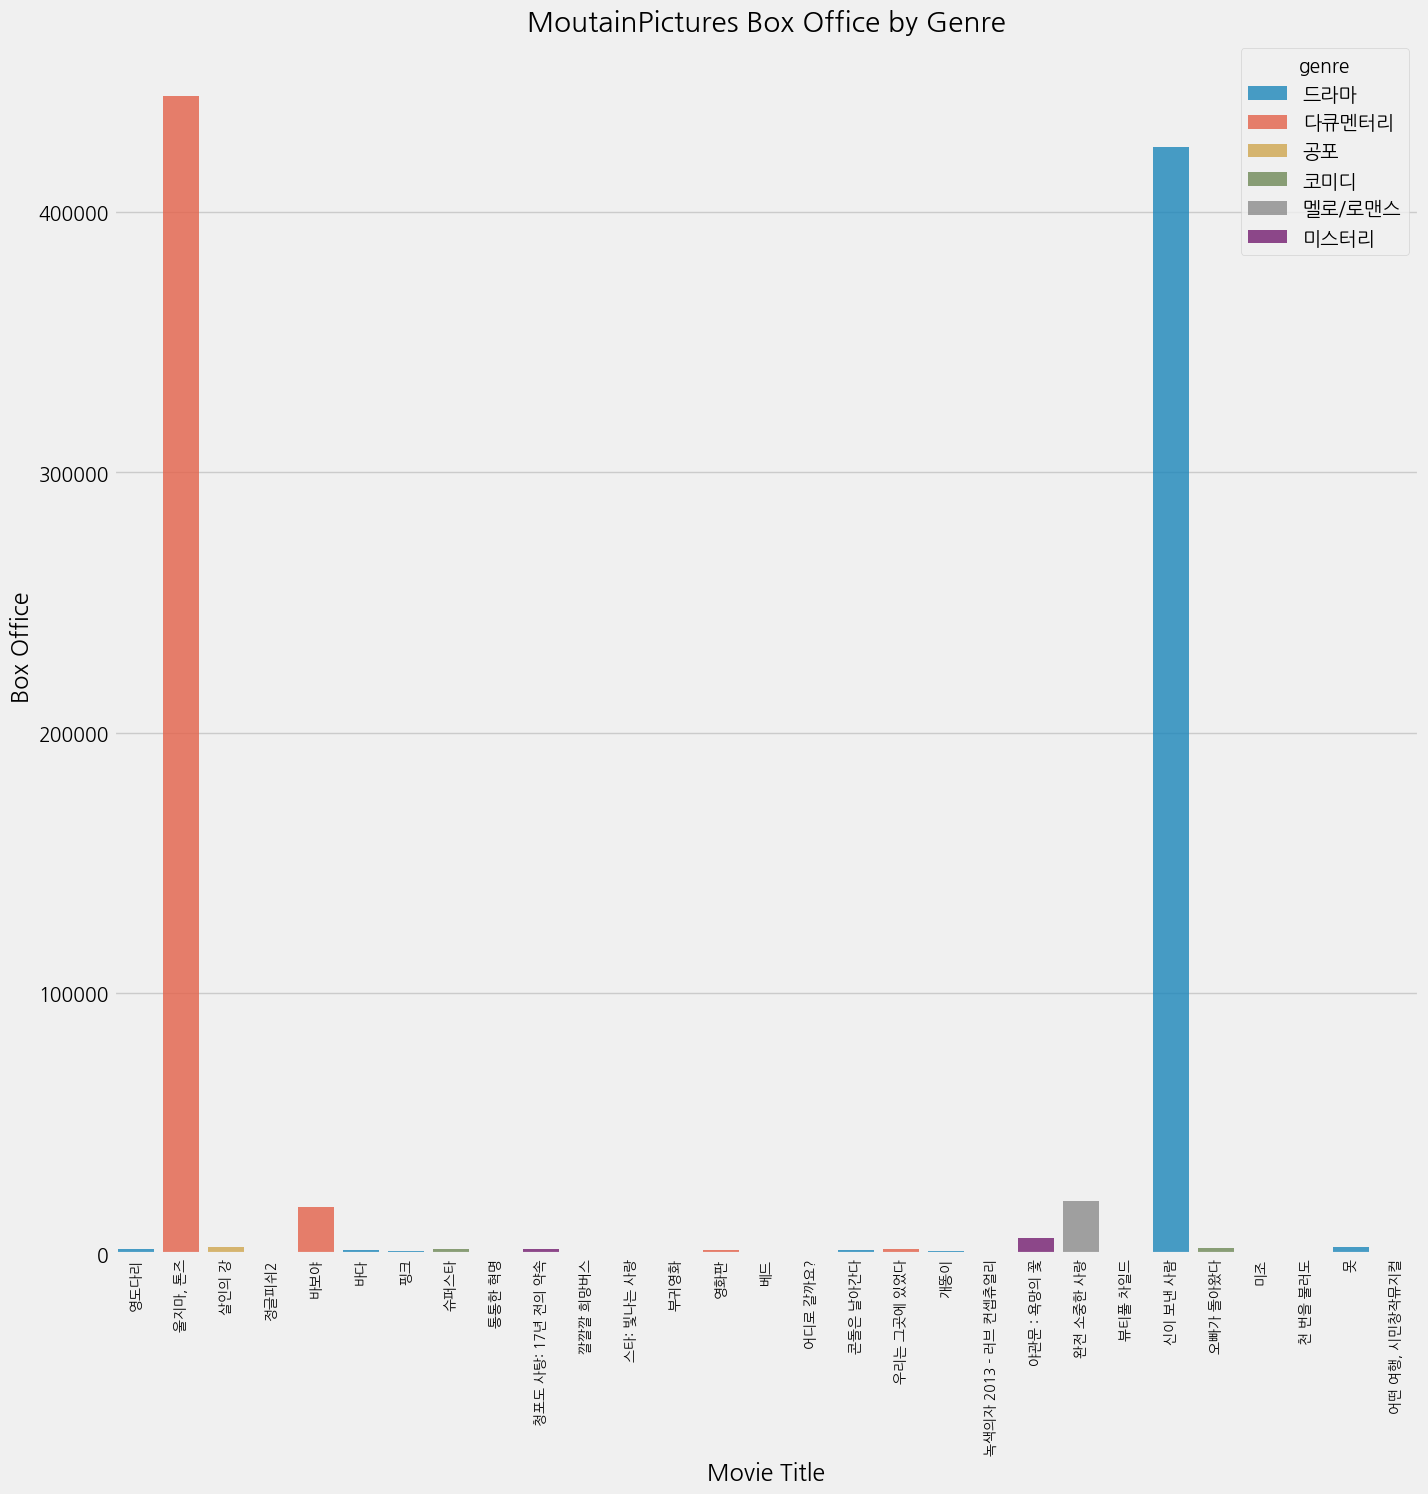

In [52]:
plt.figure(figsize=(15,15))
sns.barplot(x='title', y='box_off_num', hue='genre', data=sort_MT_data, alpha=0.8)
plt.title('MoutainPictures Box Office by Genre')
plt.xlabel('Movie Title')
plt.ylabel('Box Office')
plt.xticks(rotation=90, fontsize=10);


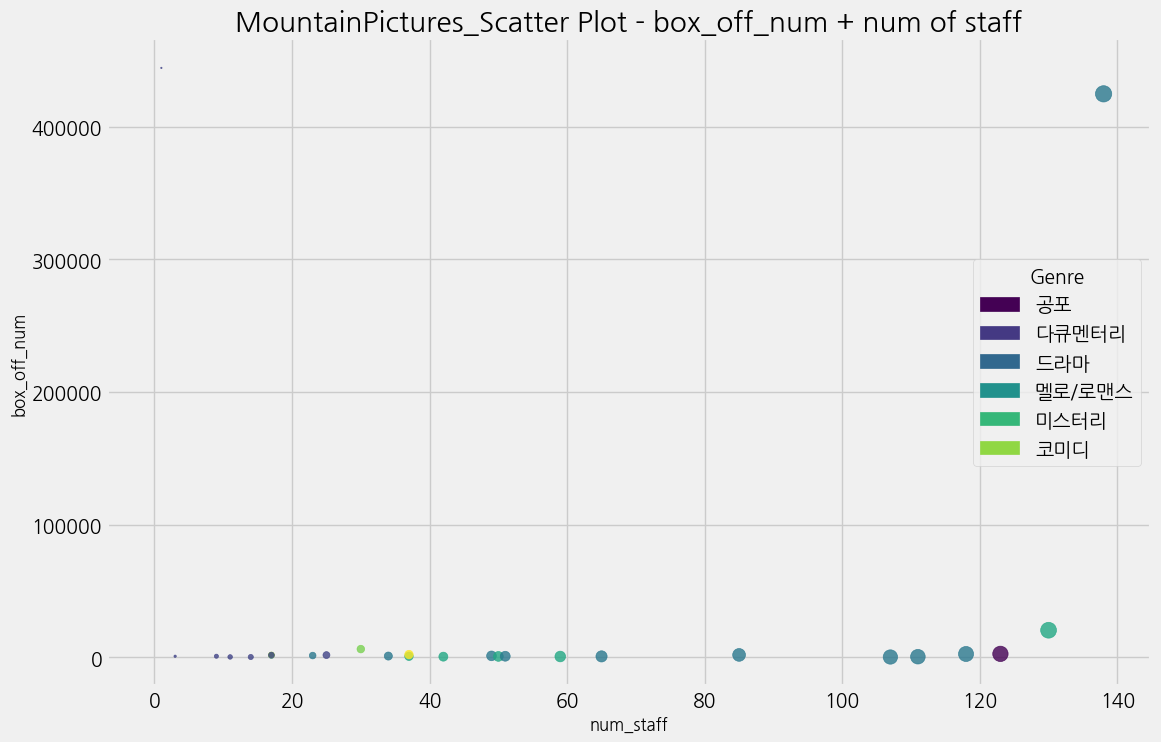

In [53]:
plt.figure(figsize=(12,8))

le3 = LabelEncoder()
sort_MT_data['genre_code'] = le3.fit_transform(sort_MT_data['genre'])

plt.scatter(sort_MT_data['num_staff'], sort_MT_data['box_off_num'], s=sort_MT_data['num_staff'], c=sort_MT_data['genre_code'], cmap='viridis', alpha=0.8)
## genre가 문자열 정보임. 범주형 변수로 변환하지 않아서 해당 정보를 바로 C랑 연결지으면 오류가 생김. --> 범주형 변수화 필요 (Label encoding 이용)

plt.xlabel("num_staff", fontsize=12)
plt.ylabel("box_off_num", fontsize=12)
plt.title('MountainPictures_Scatter Plot - box_off_num + num of staff')

cmap3 = plt.get_cmap('viridis')    ## 위에서 사용한 컬러맵 가져옴
unique_codes3 = range(len(le3.classes_)) ## le.classes = Label encoding 후 결과 가지고 있는 클래스! 

handles3 = [
    mpatches.Patch(color=cmap3(code / len(le3.classes_)), label=genre)
    ## legend에 표시되는 색상 블록 생성.
    ## code = 장르의 인코딩 값! 
    
    for code, genre in zip(unique_codes3, le3.classes_)
    ##zip = 여러개의 반복 가능한 객체를 순회하면서 동일한 인덱스의 요소를 하나로 묶어주는 함수!! 
]

plt.legend(handles=handles3, title="Genre")


plt.show()

In [54]:

SB_data = train[(train['distributor'] == '(주)쇼박스')]
sort_SB_data=SB_data.sort_values(by=['release_time'], ascending=True)

ID_data = train[(train['distributor'] == '인디스토리')]
sort_ID_data=ID_data.sort_values(by=['release_time'], ascending=True)

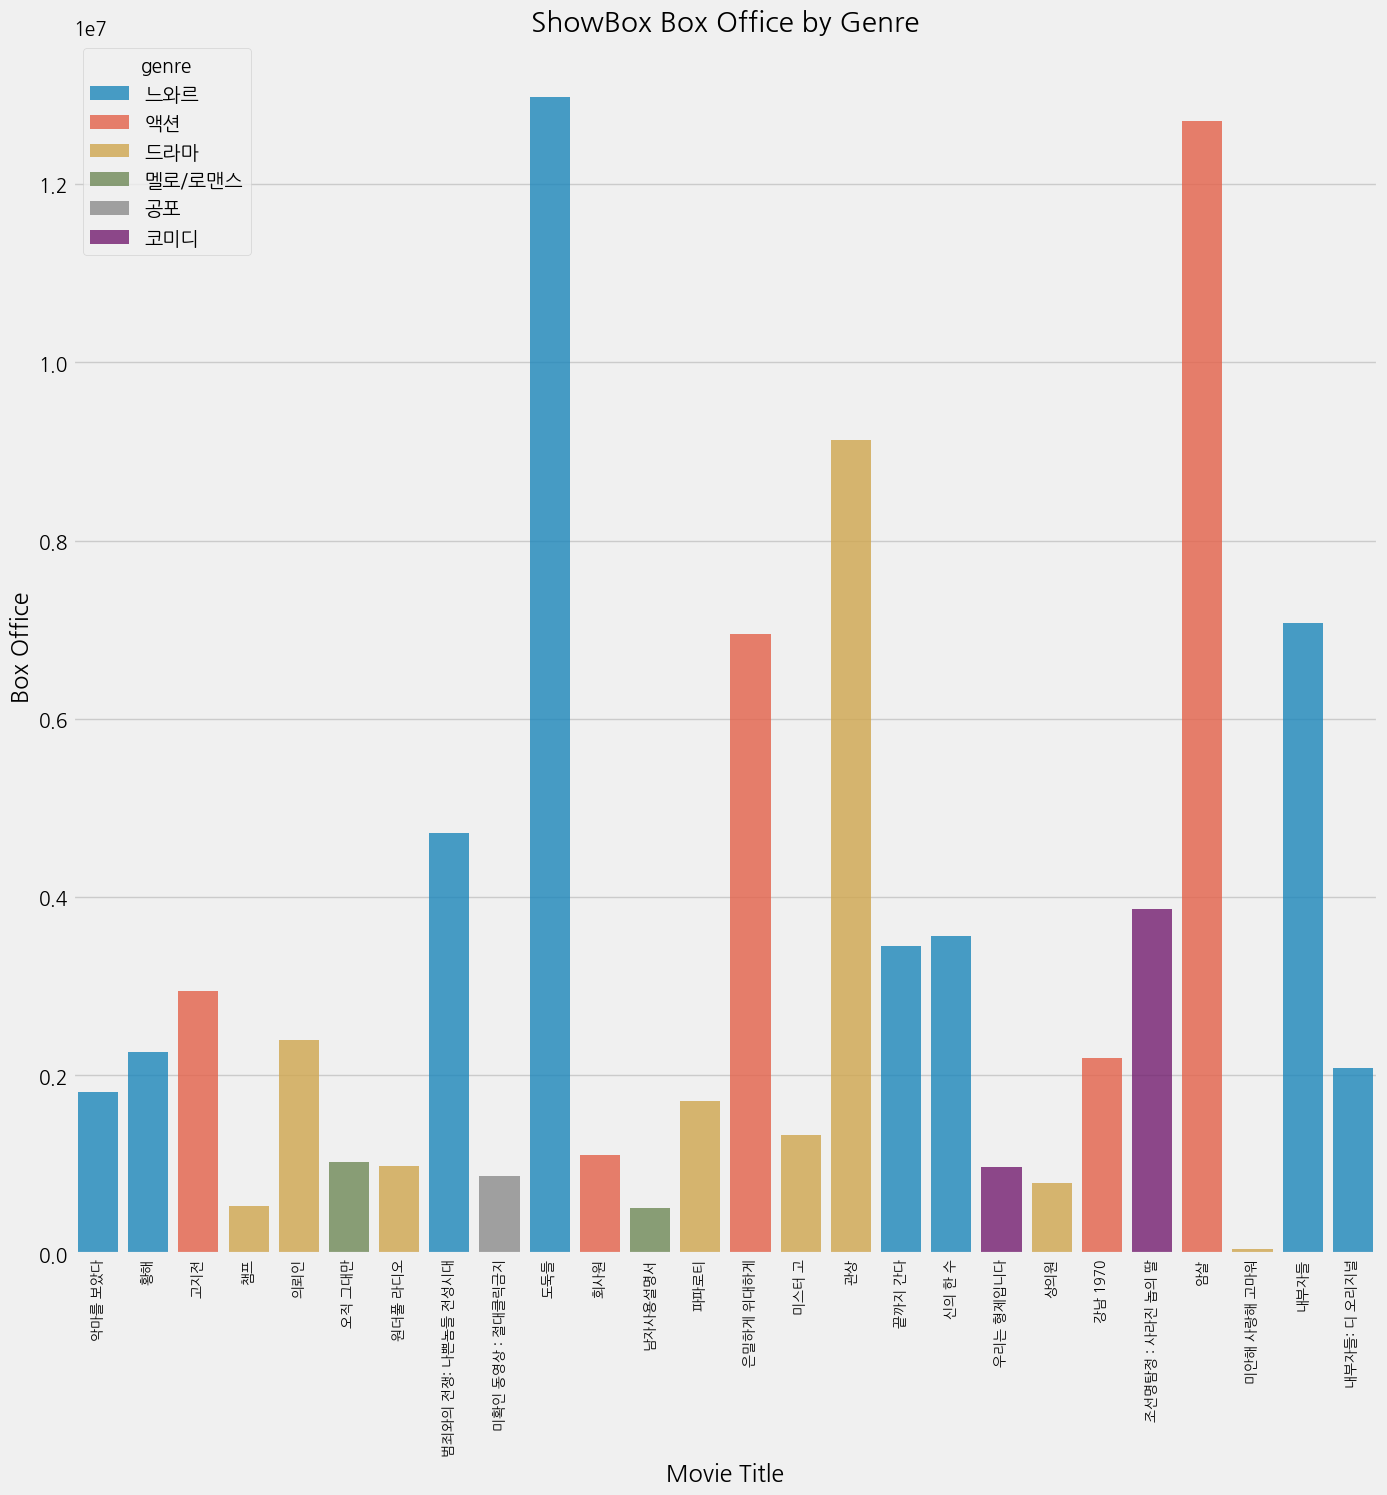

In [55]:

plt.figure(figsize=(15,15))
sns.barplot(x='title', y='box_off_num', hue='genre', data=sort_SB_data, alpha=0.8)
plt.title('ShowBox Box Office by Genre')
plt.xlabel('Movie Title')
plt.ylabel('Box Office')
plt.xticks(rotation=90, fontsize=10);

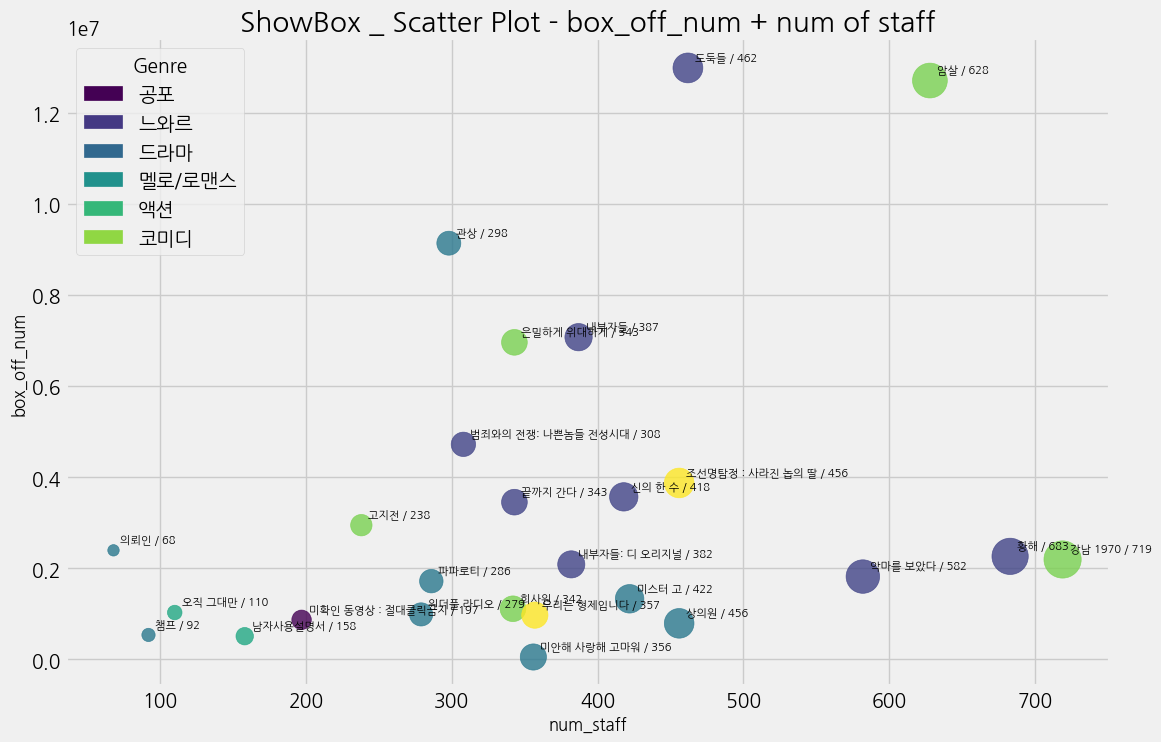

In [56]:
plt.figure(figsize=(12,8))

le4 = LabelEncoder()
sort_SB_data['genre_code'] = le4.fit_transform(sort_SB_data['genre'])

plt.scatter(sort_SB_data['num_staff'], sort_SB_data['box_off_num'], s=sort_SB_data['num_staff'], c=sort_SB_data['genre_code'], cmap='viridis', alpha=0.8)
## genre가 문자열 정보임. 범주형 변수로 변환하지 않아서 해당 정보를 바로 C랑 연결지으면 오류가 생김. --> 범주형 변수화 필요 (Label encoding 이용)

plt.xlabel("num_staff", fontsize=12)
plt.ylabel("box_off_num", fontsize=12)
plt.title('ShowBox _ Scatter Plot - box_off_num + num of staff')

cmap4 = plt.get_cmap('viridis')    ## 위에서 사용한 컬러맵 가져옴
unique_codes4 = range(len(le4.classes_)) ## le.classes = Label encoding 후 결과 가지고 있는 클래스! 

handles4 = [
    mpatches.Patch(color=cmap4(code / len(le4.classes_)), label=genre)
    ## legend에 표시되는 색상 블록 생성.
    ## code = 장르의 인코딩 값! 
    
    for code, genre in zip(unique_codes4, le4.classes_)
    ##zip = 여러개의 반복 가능한 객체를 순회하면서 동일한 인덱스의 요소를 하나로 묶어주는 함수!! 
]

plt.legend(handles=handles4, title="Genre")


for idx, row in sort_SB_data.iterrows():
    label_text = f"{row['title']} / {row['num_staff']}"
    # 각 데이터 포인트 좌표에 약간의 오프셋을 주어 텍스트가 겹치지 않도록 함
    plt.annotate(label_text, (row['num_staff'], row['box_off_num']), textcoords="offset points", xytext=(5, 5), fontsize=8, color='black')

plt.show()

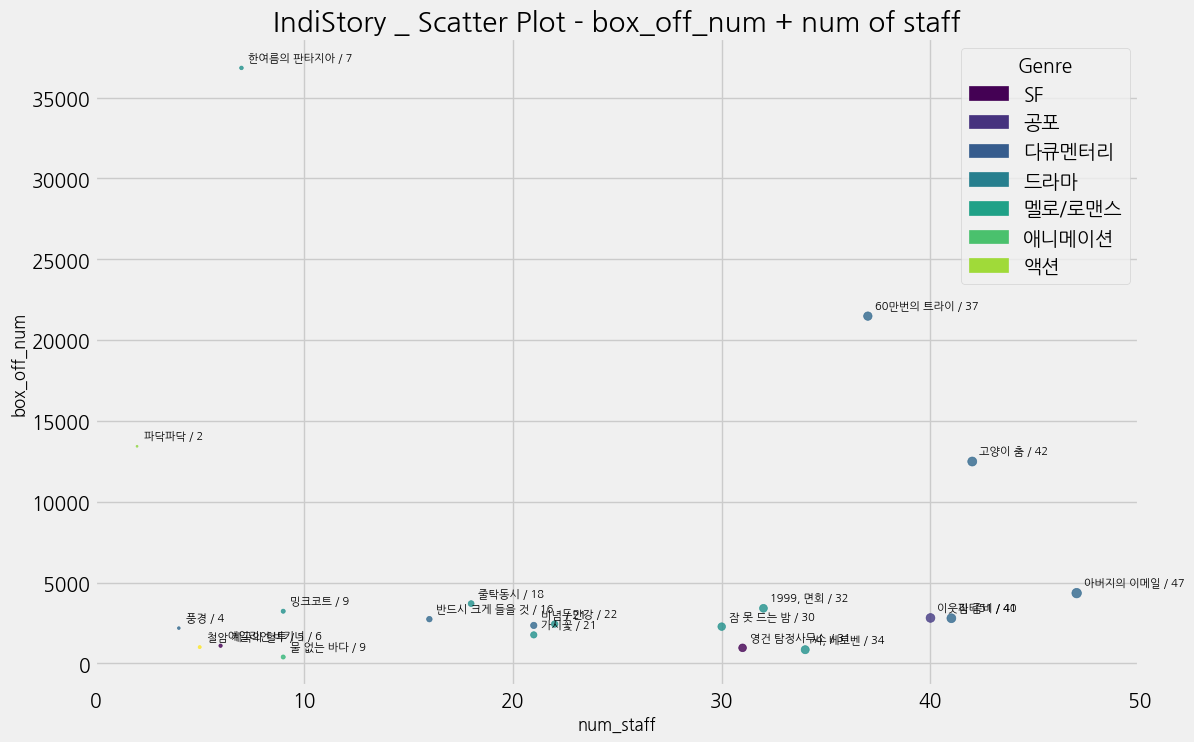

In [57]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.patches as mpatches

plt.figure(figsize=(12,8))

le5 = LabelEncoder()
sort_ID_data['genre_code'] = le5.fit_transform(sort_ID_data['genre'])

plt.scatter(sort_ID_data['num_staff'], sort_ID_data['box_off_num'], s=sort_ID_data['num_staff'], c=sort_ID_data['genre_code'], cmap='viridis', alpha=0.8)
## genre가 문자열 정보임. 범주형 변수로 변환하지 않아서 해당 정보를 바로 C랑 연결지으면 오류가 생김. --> 범주형 변수화 필요 (Label encoding 이용)

plt.xlabel("num_staff", fontsize=12)
plt.ylabel("box_off_num", fontsize=12)
plt.title('IndiStory _ Scatter Plot - box_off_num + num of staff')

cmap5 = plt.get_cmap('viridis')    ## 위에서 사용한 컬러맵 가져옴
unique_codes5 = range(len(le5.classes_)) ## le.classes = Label encoding 후 결과 가지고 있는 클래스! 

handles5 = [
    mpatches.Patch(color=cmap5(code / len(le5.classes_)), label=genre)
    ## legend에 표시되는 색상 블록 생성.
    ## code = 장르의 인코딩 값! 
    
    for code, genre in zip(unique_codes5, le5.classes_)
    ##zip = 여러개의 반복 가능한 객체를 순회하면서 동일한 인덱스의 요소를 하나로 묶어주는 함수!! 
]

plt.legend(handles=handles5, title="Genre")


for idx, row in sort_ID_data.iterrows():
    label_text = f"{row['title']} / {row['num_staff']}"
    # 각 데이터 포인트 좌표에 약간의 오프셋을 주어 텍스트가 겹치지 않도록 함
    plt.annotate(label_text, (row['num_staff'], row['box_off_num']), textcoords="offset points", xytext=(5, 5), fontsize=8, color='black')

plt.xlim(0, 50)

plt.show()

#### 결과 해석
1. CJ, 롯데
    A. CJ

      * 대중적 인지도가 높은 배우 출연 혹은 국제시장-히말라야와 같이 기존 플롯의 담습 이라는 두 가지 패턴이 눈에 띔.
        * 드라마 장르가 많으며, 액션도 배급하지만 베를린의 경우 유명 배우들이 대거 출연했기 때문에 단순히 박스오피스 뿐 아니라 손익분기점을 같이 확인할 필요성이 있다.
        * staff의 수가 400명 이상이 되는 영화, 즉 제작 규모가 큰 영화에서는 대중적 인지도가 큰 유명 배우가 다수 출연하는 모습
        * 안전성을 추구하는 모습 & 해당 영화들이 대부분 드라마, 멜로/로맨스 장르임
    B. 롯데

        * 투자 규모가 커질 수록 유명한 배우, 흥행을 보장할 수 있는 요소들이 들어간 영화들이 주를 이룸.
        * CJ와의 차이점을 본다면 투자 규모가 커질 때 해당 영화가 흥행하는 정도가 더 커짐
        * 그러나 절대적인 흥행의 정도를 따진다면 y축 값의 차이를 확인한다면 CJ에서 더 큰 흥행한다는 점을 확인할 수 있다.
   
결론적으로 두 배급사 모두 투자 규모가 커질 수록 안전한 길을 선택한다는 점이 공통적이고, 롯데의 경우 앞서 확인한 것처럼 코미디 장르를 꾸준히 배급한다는 점이 눈에 띈다.

가장 큰 차이점은 CJ의 경우 제작규모가 큰데도 불구하고 큰 흥행을 하지 못하는 경우가 많다는 점, 롯데의 경우 제작 규모가 커질 수록 흥행할 확률이 더 높아진다는 점으로 보인다.

2. NEW, 마운틴 픽쳐스

    A. NEW

   * 흥행과 제작 규모의 정도가 비례하는 모습을 보이지 않음.
    대부분의 장르가 드라마이고 이러한 패턴은 '변호인'이 크게 흥행한 후에 더욱 강화된 모습을 보임.
        * 그러나 앞선 배급사들과 다르게 흥행한 영화들의 장르가 5가지로 좀 더 다양한 모습을 보임
    B. 마운틴픽쳐스

    * 뚜렷한 패턴이 보인다고 하기 어려움. 무엇보다 앞선 배급사들과 달리 흥행 정도가 작은 편.
  

3. 쇼박스

    * 느와르와 액션, 드라마 장르를 대부분 배급하고 있는 것이 다시 한 번 확인됨
    * 느와르 장르는 꾸준히 배급해왔음
    * 가장 흥행한 영화 또한 메인 배급 장르인 느와르와 액션에서 대부분 나옴
    * 오히려 다수 제작사에서 배급하는 드라마 장르의 경우 '관상'을 제외하고서는 큰 흥행을 하지 못했다는 점이 특이
    * 제작규모와 흥행 정도는 큰 연관이 있어 보이지 않다.

#### 결론
CJ, lotte 같은 대형 배급사일 수록 메인 장르를 두고 최대한 다양한 장르 영화를 배급하는 패턴을 보인다. 그러나 제작 규모가 커질수록 대중적으로 흥행할 확률이 높은 안전한 영화를 배급하는 모습을 보인다.

NEW, 마운틴픽쳐스, 쇼박스 등의 배급사의 경우 배급하는 특정 장르가 정해져 있는 모습을 보인다. 그러나 그 장르의 경우 위의 대형 배급사와 달리 다양하게 나타난다고 할 수 있으며, 해당 영화들이 대중적으로 흥행하는 모습이 나타나기도 한다. 즉, 선택과 집중 전략이 성공한 케이스라고 할 수 있다.

## 6. 장르별 관객수

In [58]:
# 절대적인 관객수 계산

sort=train.groupby('genre')['box_off_num'].agg('sum').sort_values(ascending=False)
print(sort)
     

genre
드라마       138277444
코미디        63277442
액션         61711274
느와르        61119768
멜로/로맨스     33225507
공포         24814966
SF         23248494
미스터리        8968319
다큐멘터리       6247020
애니메이션       3820460
서스펜스         165222
뮤지컬           33135
Name: box_off_num, dtype: int64


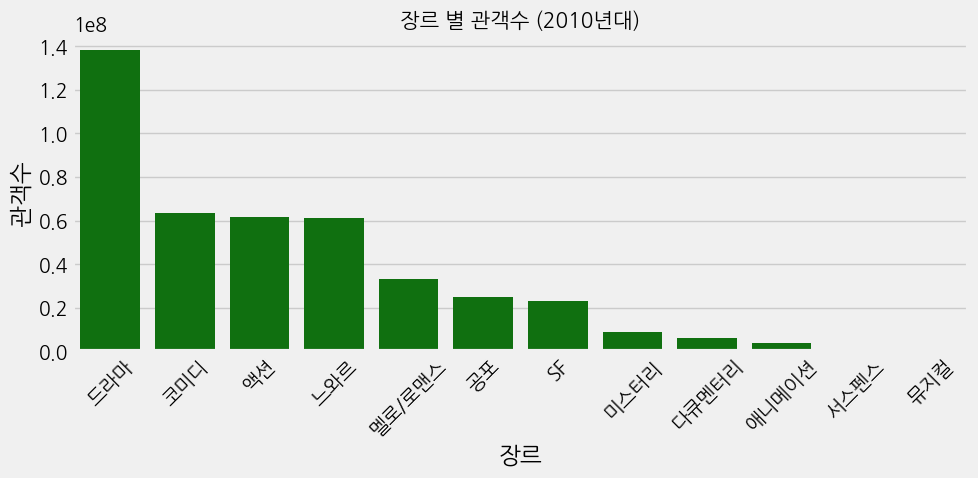

In [59]:
plt.figure(figsize=(10,5))
sns.barplot(x='genre',y='box_off_num',data=train,ci=None,estimator='sum',order=sort.index,color='green')

plt.xticks(rotation=45)
plt.xlabel('장르')
plt.ylabel('관객수')
plt.title('장르 별 관객수 (2010년대)',fontsize=15)
plt.tight_layout()
plt.show()
     

In [60]:
# 정확한 비교를 위해 평균 관객수 구하기

sort2=train.groupby('genre')['box_off_num'].agg('mean').sort_values(ascending=False)
genre_count=train['genre'].value_counts()
print('장르 별 평균 관객수:\n',sort2,'\n','장르 빈도:\n',genre_count)

장르 별 평균 관객수:
 genre
느와르       2.263695e+06
액션        2.203974e+06
SF        1.788346e+06
코미디       1.193914e+06
드라마       6.256898e+05
공포        5.908325e+05
미스터리      5.275482e+05
멜로/로맨스    4.259680e+05
애니메이션     1.819267e+05
서스펜스      8.261100e+04
다큐멘터리     6.717226e+04
뮤지컬       6.627000e+03
Name: box_off_num, dtype: float64 
 장르 빈도:
 genre
드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: count, dtype: int64


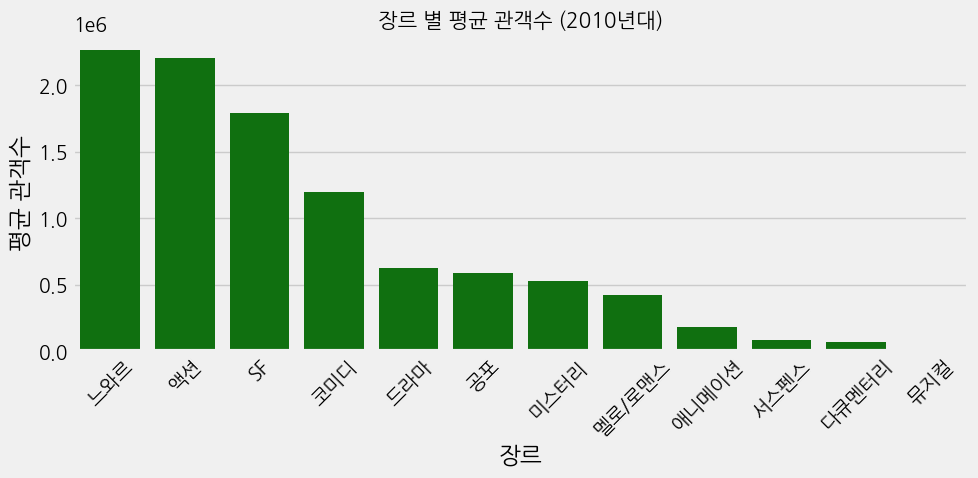

In [61]:
plt.figure(figsize=(10,5))
sns.barplot(x='genre',y='box_off_num',data=train,ci=None,order=sort2.index,color='green')

plt.xticks(rotation=45)
plt.xlabel('장르')
plt.ylabel('평균 관객수')
plt.title('장르 별 평균 관객수 (2010년대)',fontsize=15)
plt.tight_layout()
plt.show()
     

## 7.계절에 따른 개봉 장르

In [62]:
# 개봉날짜의 월만 추출하여 새로운 칼럼 생성

train['release_time_month']=train['release_time'].dt.month
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_time_month
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,11
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,11
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,6
3,나는 공무원이다,NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,7
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,11


In [63]:
from ast import IfExp
# 계절 분류 함수 정의
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

# train 데이터프레임에 'season' 컬럼 추가
train["season"] = train["release_time_month"].apply(get_season)

In [64]:
train.head(10)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_time_month,season
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,11,Fall
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,11,Fall
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,6,Summer
3,나는 공무원이다,NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,7,Summer
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,11,Fall
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211,10,Fall
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,0.00,0,32,5,53526,5,Spring
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,739522.00,3,342,2,1110523,10,Fall
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,0.00,0,3,5,4778,9,Fall
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,0.00,0,138,3,868,3,Spring


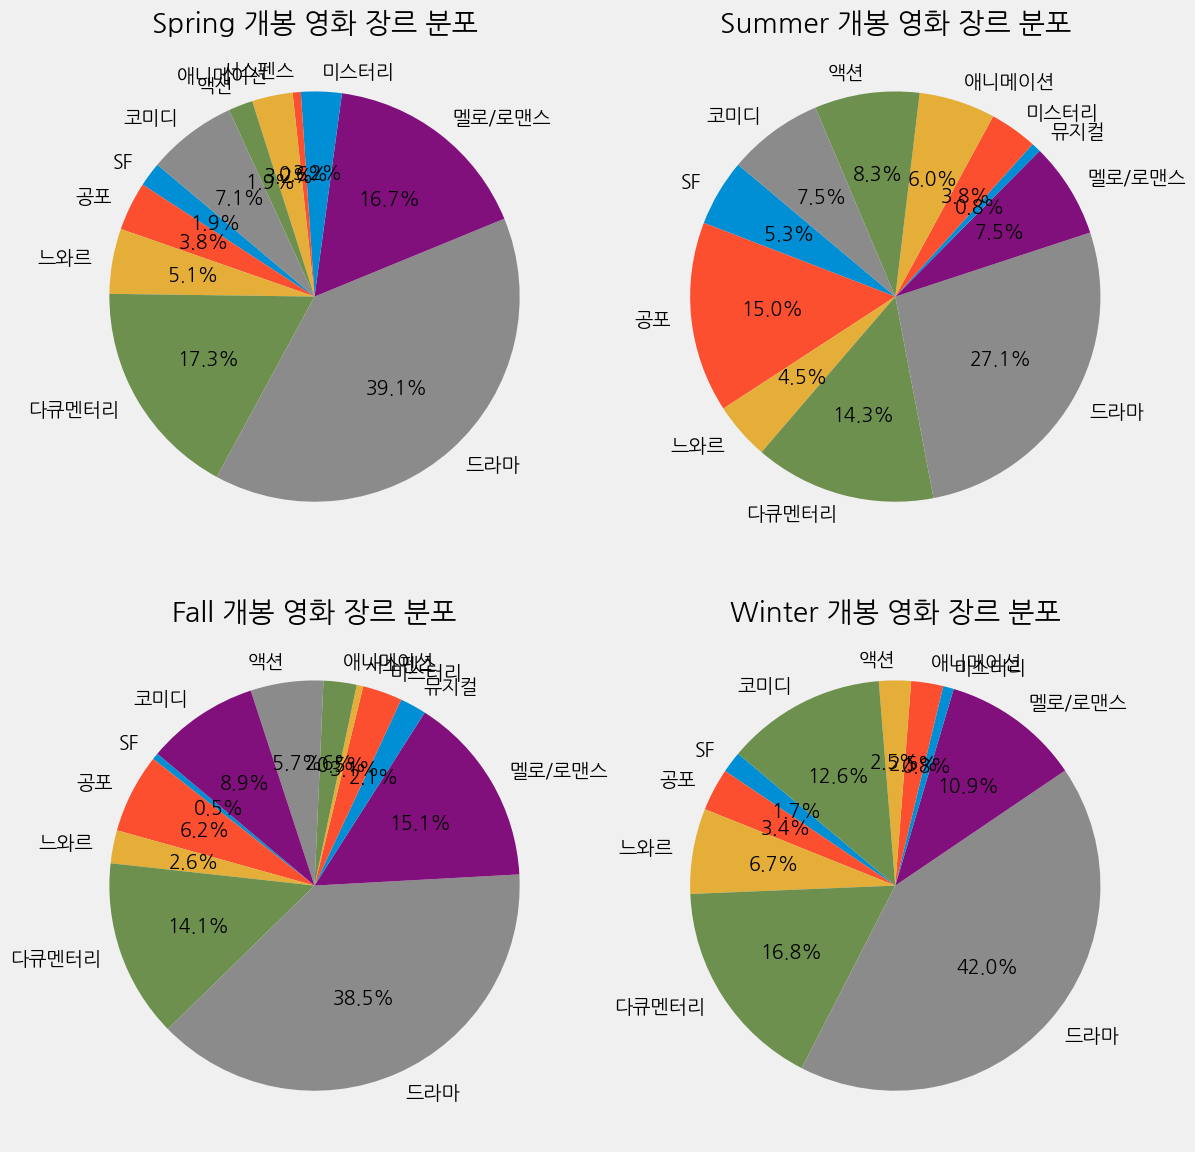

In [65]:
# 계절 별 장르 개수 계산
season_genre_counts = train.groupby('season')['genre'].value_counts().unstack()

seasons = ["Spring", "Summer", "Fall", "Winter"]
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, season in enumerate(seasons):
    ax = axes[i // 2, i % 2]
    genre_counts = season_genre_counts.loc[season].dropna()
    ax.pie(genre_counts, labels=genre_counts.index, autopct="%1.1f%%", startangle=140)
    ax.set_title(f"{season} 개봉 영화 장르 분포")

plt.tight_layout()
plt.show()

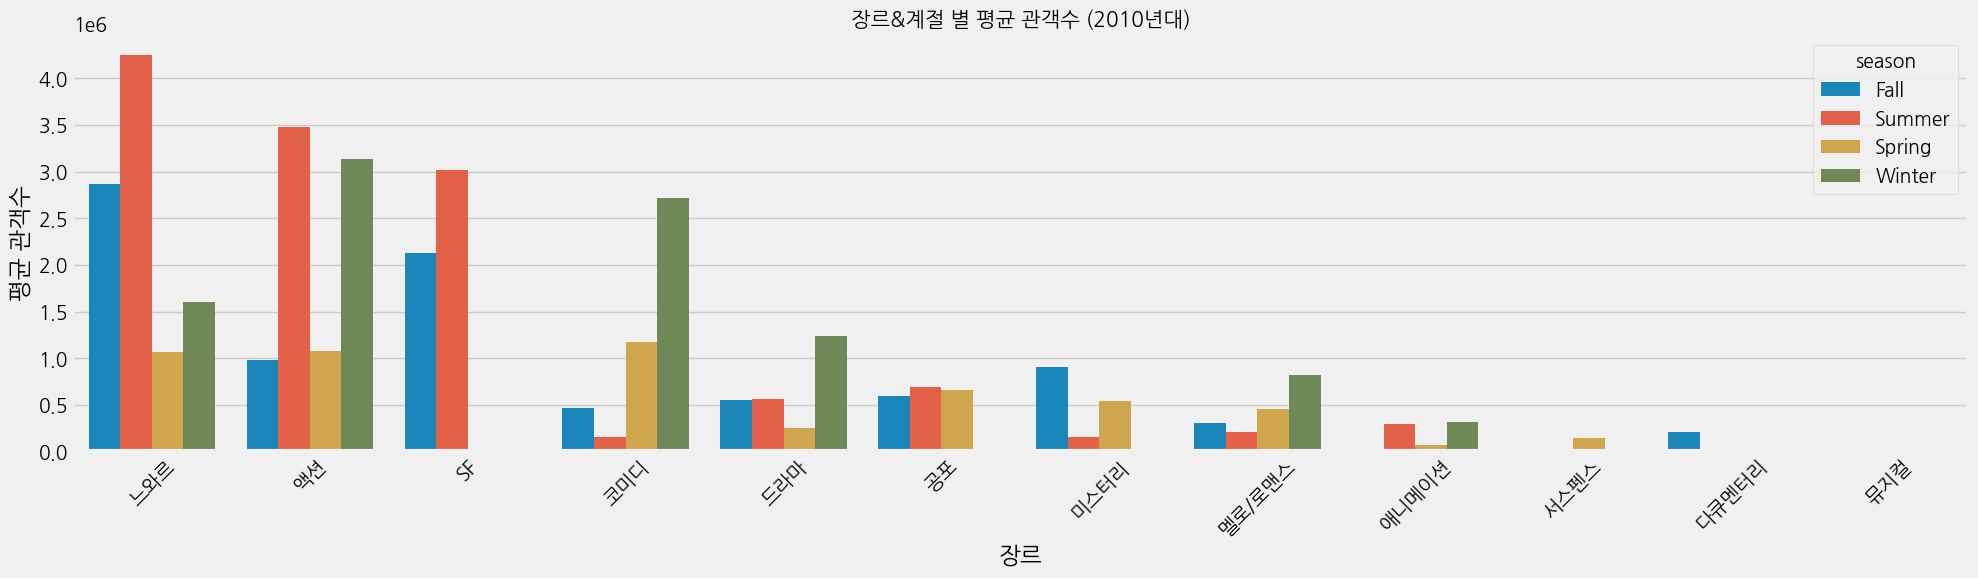

In [66]:
# 장르, 계절 별 평균 관객수 시각화

plt.figure(figsize=(20,6))
sns.barplot(x='genre',y='box_off_num',hue='season',data=train,ci=None,order=sort2.index)

plt.xticks(rotation=45)
plt.xlabel('장르')
plt.ylabel('평균 관객수')
plt.title('장르&계절 별 평균 관객수 (2010년대)',fontsize=15)
plt.tight_layout()
plt.show()

#### [결과 해석 및 결론]
(1) 장르 별 관객수 vs 평균 관객수

   * 절대적 관객수 순위: 드라마 >>> 코미디, 액션, 느와르 >> 멜로 > 공포, SF > 미스터리, 다큐멘터리, 애니메이션 > 서스펜스, 뮤지컬

   * 절대적인 관객수는 드라마가 압도적으로 많음 (약 1억 4천명)

   * 액션, 드라마, 코미디 장르가 가장 많은 누적 관객 수를 기록함.

   * 다큐멘터리, 뮤지컬, 애니메이션 등은 상대적으로 관객 수가 낮음.

   * 대체로 대중적인 장르가 더 많은 관객을 확보하는 경향을 보임.

   * 평균 관객수 순위: 느와르, 액션 >> SF >> 코미디 >> 드라마, 공포, 미스터리, 멜로 >> 애니메이션 > 서스펜스, 다큐멘터리 > 뮤지컬

   * 장르별 누적 관객 수와 달리, 장르별 평균 관객 수는 다르게 나타남. 일부 장르는 작품 수가 적어도 평균 관객 수가 높을 수 있음. 느와르, SF 장르가 평균적으로 높은 관객 수를 보이는 특징이 있음.

(2) 계절과 장르, 관객수

봄(3~5월) – 로맨스, 코미디, 드라마 장르 영화가 주로 개봉됨.

   * 봄은 감성적인 분위기에 맞춰 로맨틱 코미디 영화가 강세를 보이는 시기.

여름(6~8월) – 다른 계절에 비해 공포 영화가 많이 개봉함. 액션, SF, 공포 장르의 영화가 가장 많이 개봉됨.

   * 여름철 납량 효과, 시원한 극장에서 즐기려는 관객 심리 등의 이유를 반영한 결과.
   * 액션 장르도 비슷한 이유로, 다른 계절에 비해 여름에 많이 개봉했다고 볼 수 있음.

가을(9~11월) – 느와르, 미스터리 장르 영화 개봉이 많음.

   * 가을은 영화제 시즌(부산국제영화제 등)과 맞물려 작품성 높은 영화들이 개봉하는 경향이 있으며, 할리우드에서는 아카데미 시즌을 겨냥한 작품들이 나오는 시기.

겨울(12~2월) – 애니메이션, 코미디, 드라마 장르가 많이 개봉됨.

   * 연말연시와 방학 시즌을 고려한 배급 전략이 반영되었다고 유추 가능.
#### [결론]

* 드라마 관객수가 많은 이유는 단순히 많은 영화가 개봉했기 때문이라고 유추 가능.
* 다큐멘터리의 경우, 개봉작수는 2위지만 관객수는 하위권이므로 비교적 인기가 덜 한 장르라고 할 수 있음.
* 장르별 영화 개봉 수와 흥행 성적 간의 관계는 다를 수 있음.
* 작품 수는 적지만 충성도 높은 관객층을 가진 장르도 존재함.
* 흥행을 목표로 한다면 액션/드라마/코미디 장르를 선택하는 것이 유리함.


## 8-1. 개봉 시기에 따른 관객 수의 변화 추이 확인하기
* 연도별 평균 관객 수의 변화를 Line plot과 Box plot로 시각화
* 이를 통해 연도별 영화 시장의 변화나 특정 개봉 시즌의 흥행 경향을 분석해보고자 함

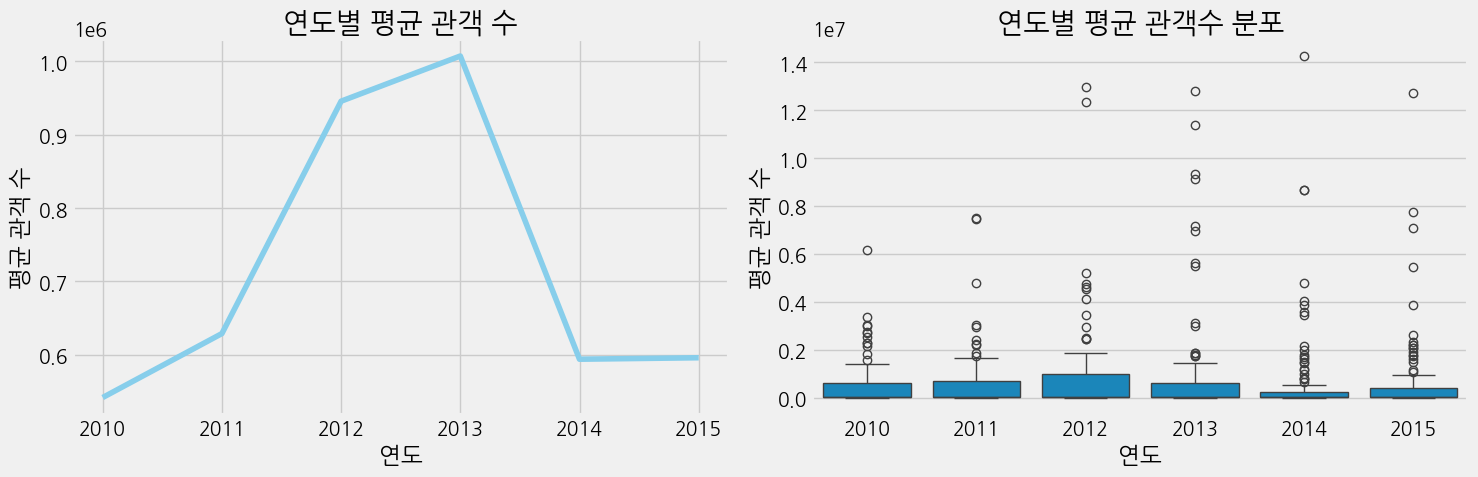

In [67]:
# 연도별 평균 관객 수를 계산
train['year'] = train['release_time'].dt.year
yearly_box_office = train.groupby('year')['box_off_num'].mean().reset_index()

# subplots을 생성
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# lineplot 시각화
sns.lineplot(data=yearly_box_office, x='year', y='box_off_num', ax=axes[0], color='skyblue')
axes[0].set_title('연도별 평균 관객 수')
axes[0].set_xlabel('연도')
axes[0].set_ylabel('평균 관객 수')

# boxplot 시각화
sns.boxplot(data=train, x = 'year', y = 'box_off_num', ax=axes[1])
axes[1].set_title('연도별 평균 관객수 분포')
axes[1].set_xlabel('연도')
axes[1].set_ylabel('평균 관객 수')

plt.tight_layout()
plt.show()
     

## 8-2. 연도에 따른 상영 등급 별 평균 관객 수 비교하기
* 연도에 따른 상영 등급 별 관객수를 line plot으로 시각화
* 이를 통해 상영 등급 별 평균 관객수 추이를 파악하고

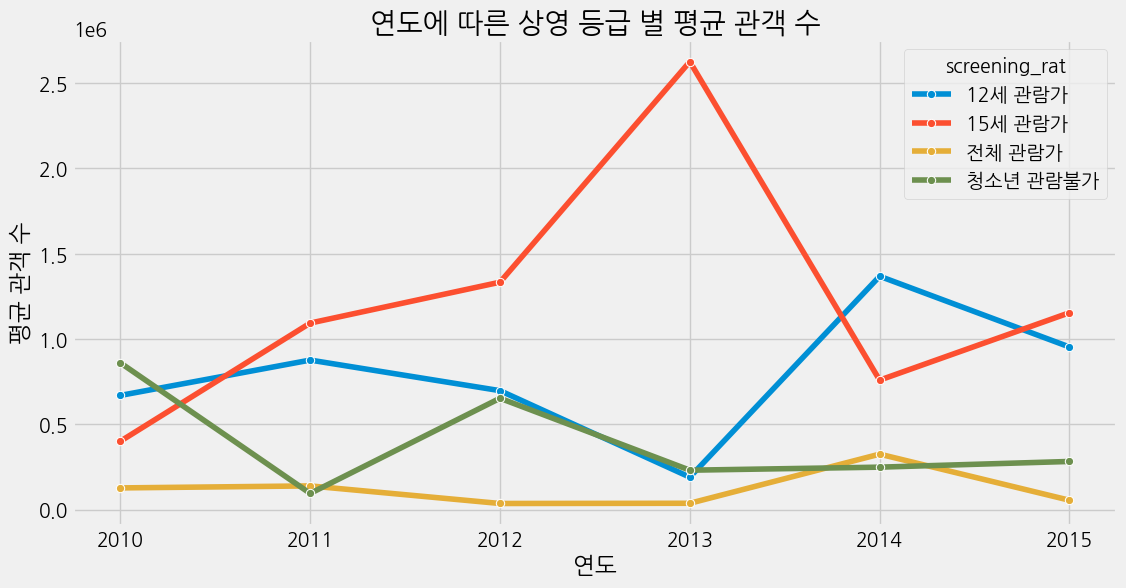

In [68]:
# 시간에서 연도만 추출
train['year'] = train['release_time'].dt.year

# 상영 등급별로 연도별 평균 관객 수 계산
avg_box_office_by_year_and_rating = train.groupby(['year', 'screening_rat'])['box_off_num'].mean().reset_index()

# lineplot 그리기
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_box_office_by_year_and_rating, x='year', y='box_off_num', hue='screening_rat', marker='o')

# 제목과 레이블 설정
plt.title('연도에 따른 상영 등급 별 평균 관객 수')
plt.xlabel('연도')
plt.ylabel('평균 관객 수')

plt.show()

## 8-3. 연도에 따른 상영 등급 별 가장 높은 관객수를 기록한 영화 찾기

In [69]:
# 상영 등급과 연도별로 가장 높은 관객 수를 기록한 영화 찾기
max_rate = train.loc[train.groupby(['year', 'screening_rat'])['box_off_num'].idxmax()]

# 결과 출력
for idx, row in max_rate.iterrows():
    print(f"연도: {row['year']}, 상영 등급: {row['screening_rat']}, 영화 제목: {row['title']}, 관객 수: {row['box_off_num']}")
     

연도: 2010, 상영 등급: 12세 관람가, 영화 제목: 헬로우 고스트, 관객 수: 3019960
연도: 2010, 상영 등급: 15세 관람가, 영화 제목: 초능력자, 관객 수: 2130645
연도: 2010, 상영 등급: 전체 관람가, 영화 제목: 마음이 2, 관객 수: 696382
연도: 2010, 상영 등급: 청소년 관람불가, 영화 제목: 아저씨, 관객 수: 6178665
연도: 2011, 상영 등급: 12세 관람가, 영화 제목: 조선명탐정 : 각시투구꽃의 비밀, 관객 수: 4786259
연도: 2011, 상영 등급: 15세 관람가, 영화 제목: 최종병기 활, 관객 수: 7482180
연도: 2011, 상영 등급: 전체 관람가, 영화 제목: 마당을 나온 암탉, 관객 수: 2202788
연도: 2011, 상영 등급: 청소년 관람불가, 영화 제목: 풍산개, 관객 수: 714136
연도: 2012, 상영 등급: 12세 관람가, 영화 제목: 타워, 관객 수: 5181014
연도: 2012, 상영 등급: 15세 관람가, 영화 제목: 도둑들, 관객 수: 12983841
연도: 2012, 상영 등급: 전체 관람가, 영화 제목: 나는 공무원이다, 관객 수: 217866
연도: 2012, 상영 등급: 청소년 관람불가, 영화 제목: 범죄와의 전쟁: 나쁜놈들 전성시대, 관객 수: 4720050
연도: 2013, 상영 등급: 12세 관람가, 영화 제목: 미스터 고, 관객 수: 1329061
연도: 2013, 상영 등급: 15세 관람가, 영화 제목: 7번방의 선물, 관객 수: 12811435
연도: 2013, 상영 등급: 전체 관람가, 영화 제목: 미나문방구, 관객 수: 334323
연도: 2013, 상영 등급: 청소년 관람불가, 영화 제목: 친구 2, 관객 수: 2971475
연도: 2014, 상영 등급: 12세 관람가, 영화 제목: 국제시장, 관객 수: 14262766
연도: 2014, 상영 등급: 15세 관람가, 영화 제목: 수상한 그녀, 관객 수: 8659725
연도:

#### [시각화 분석]

연도별 평균 관객 수를 분석한 결과를 보면 2012년과 2013년이 다른 해보다 높은 관객 수를 기록한 것을 확인할 수 있었습니다. 특히 2012년은 전반적으로 평균 관객 수가 높았으며, 다양한 영화들이 고르게 흥행하여 전체적으로 안정적인 관객 수 증가를 보인 해로 예측할 수 있었습니다. 반면, 2013년은 일부 영화가 매우 높은 관객 수를 기록하여 전체 평균을 끌어올린 것으로 보입니다.

이를 좀 더 구체적으로 살펴보기 위해 boxplot을 이용한 연도별 관객 수 분포 분석을 수행한 결과, 2012년은 분포 폭이 가장 넓어 다양한 관객 수를 기록한 영화들이 많았음을 시사합니다. 이는 특정 영화만이 아니라 여러 영화가 골고루 흥행했을 가능성을 나타내며, 시장 전반에 걸쳐 안정적인 성장을 보였음을 시사할 수 있습니다.

반면, 2013년은 이상값이 많이 나타난 것이 특징이었습니다. 이는 일부 영화들이 다른 영화들에 비해 급격히 높은 관객 수를 기록했음을 의미하며, 대형 블록버스터나 특정 히트작이 시장을 주도했을 가능성이 크다는 것을 추측해볼 수 있었습니다.

연도에 따른 상영등급별 평균 관객수를 시각화한 결과, 대체적으로 15세 관람가 영화가 높은 관객수를 기록하는 경향을 확인할 수 있었고, 특히 2013년에는 압도적으로 높은 관객수를 기록한 해였음을 알 수 있었습니다. 2010년에는 일반적으로 낮은 관객수를 보이는 청소년 관람불가 등급이 그 해에서 가장 높은 관객수를 기록한 등급으로 나타났습니다. 또한 2014년에는 12세 관람가 영화가 가장 높은 관객수를 기록했으며, 전체 관람가 영화들은 대체로 가장 낮은 관객수를 보이는 경향을 보였습니다.

각 연도별로 가장 높은 관객수를 기록한 영화가 어떤 영화 덕분에 해당 관객수를 차지했는지를 살펴본 결과, 2010년에는 영화 '아저씨'가 개봉함에 따라 청소년 관람불가 등급 영화가 높은 관객수를 기록하게 되었습니다. 2011년에는 15세 관람가 영화인 '최종병기 활'이 가장 높은 관객수를 기록했습니다. 2012년에는 15세 관람가 영화 '도둑들'이 개봉하여 전반적인 관객 수 증가에 기여한 것으로 보입니다. 2013년에는 15세 관람가 영화 '7번방의 선물'이 압도적인 관객수를 기록하게 된 것을 확인할 수 있었습니다. 또한 2013년에는 영화 '범죄와의 전쟁'과 같은 대형 블록버스터가 전체 관객 수를 증가시킨 요인으로 분석되었습니다. 2014년에는 12세 관람가 영화 '국제시장'의 개봉으로 높은 관객수를 기록한 해임을 알 수 있었습니다. 이를 통해 각 연도의 특정 영화들이 관객수에 큰 영향을 미쳤음을 확인할 수 있었습니다.

## 9-1) 상영시간에 따른 영화 편 수 확인하기

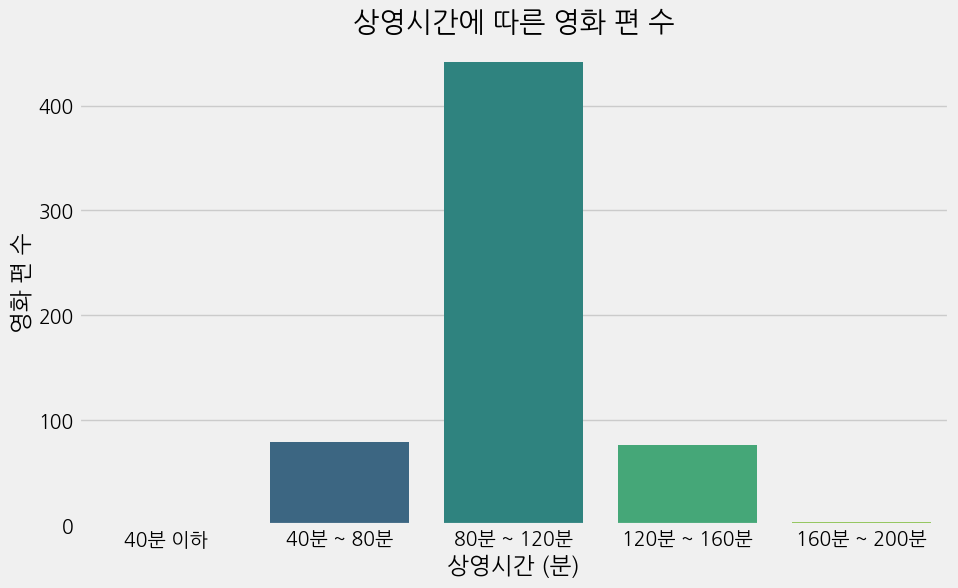

In [70]:
# 상영시간을 구간으로 그룹화하기
bins = [0, 40, 80, 120, 160, 200]
labels = ['40분 이하', '40분 ~ 80분', '80분 ~ 120분', '120분 ~ 160분', '160분 ~ 200분']
train['time_group'] = pd.cut(train['time'], bins=bins, labels=labels)

# 상영시간 구간별 영화 편 수 계산
time_group_count = train['time_group'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=time_group_count.index, y=time_group_count.values, palette='viridis')
plt.title('상영시간에 따른 영화 편 수')
plt.xlabel('상영시간 (분)')
plt.ylabel('영화 편 수')
plt.show()

### 9-2 상영시간에 따른 장르별 관객수 파악하기

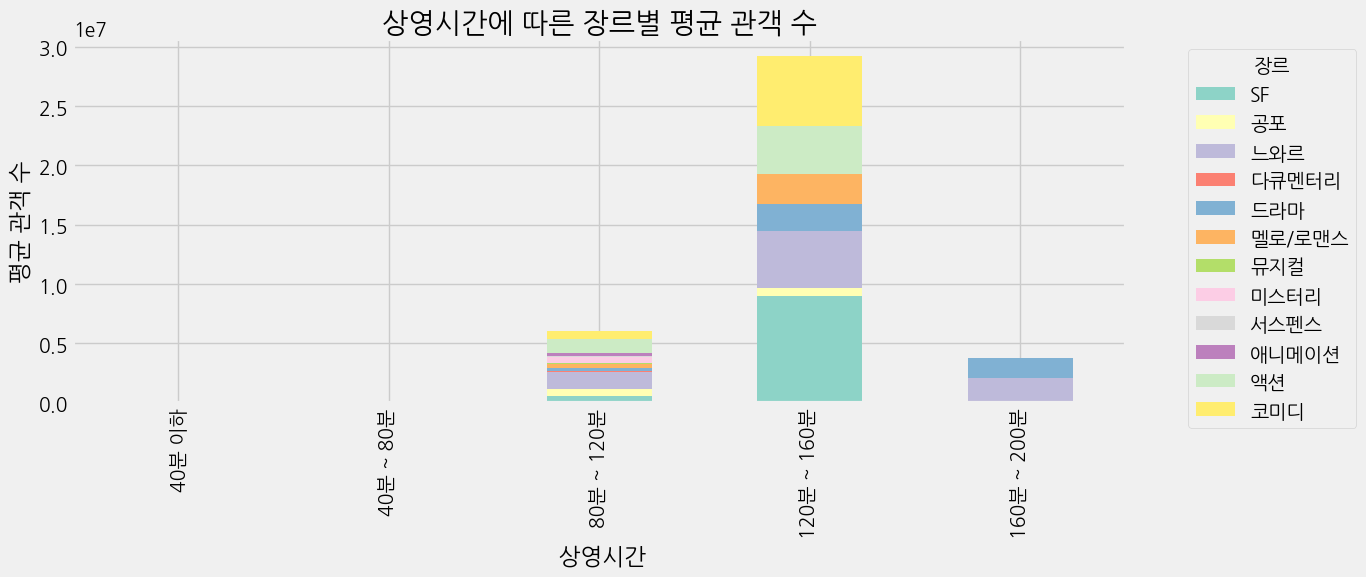

In [71]:
# 상영시간에 따른 장르별 평균 관객 수 계산
avg_nums = train.groupby(['time_group', 'genre'])['box_off_num'].mean().unstack().fillna(0)

# 장르별로 색을 다르게 하기 위한 색상 팔레트 지정
colors = sns.color_palette('Set3', n_colors=avg_nums.shape[1])

# Barplot (각 장르를 쌓아서 올리는 방식으로 나타내기)
avg_nums.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# 제목과 레이블 설정
plt.title('상영시간에 따른 장르별 평균 관객 수')
plt.xlabel(' 상영시간')
plt.ylabel('평균 관객 수')

# 범례를 그래프 밖으로 설정
plt.legend(title='장르', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

#### 시각화 분석
상영시간에 따른 영화의 편수 분석 결과, 80분에서 120분 사이의 영화가 가장 많은 수를 차지하는 것으로 나타났습니다. 이는 대부분의 영화들이 이 범위에 속한다는 것을 의미하며, 일반적으로 상영시간이 1시간 20분에서 2시간 내외로 설정되는 경향이 있음을 나타냅니다. 상영시간이 짧거나 긴 영화는 상대적으로 제작과 상영 측면에서 더 제한적이기 때문에 많은 영화들이 중간 범위의 상영시간을 선택하는 경향이 있다는 것을 알 수 있습니다.

한편 상영시간에 따른 장르별 평균 관객수 분석에서는 120분과 160분 사이의 영화가 가장 높은 관객수를 기록한 것으로 나타났습니다. 이는 장르별로 관객의 선호도가 상영시간에 영향을 받는다는 것을 의미합니다. 예를 들어, SF나 액션 영화처럼 이야기가 긴 전개를 요구하는 장르는 상영시간이 긴 경향이 있으며, 이러한 영화들이 더 많은 관객을 끌어들인다는 분석을 할 수 있습니다. 특히 상영시간이 길어질수록 깊이 있는 스토리 전개나 세밀한 제작이 가능해져 관객들에게 더 큰 인기를 얻는 것으로 해석할 수 있습니다.

상영시간이 긴 영화들이 대체로 높은 관객 수를 기록한 반면, 상영시간이 짧은 영화는 상대적으로 적은 관객 수를 기록하는 경향이 있었습니다. 이는 짧은 상영시간의 영화가 상대적으로 서사 전개에 한계가 있을 수 있으며, 관객들이 느끼는 만족도가 낮아질 가능성이 있음을 시사합니다. .

따라서 상영시간이 80분에서 120분 사이의 영화들이 대체로 제작되지만 장르나 영화의 특성에 따라 상영시간이 긴 영화들이 더 많은 관객을 확보할 수 있는 경향이 있다는 점을 확인할 수 있었습니다. 이는 장르별 관객의 특성을 반영하여 상영시간을 설정하는 것이 관객수 증대에 긍정적인 영향을 미칠 수 있음을 확인할 수 있었습니다.